# Assignment 2

---

Mads Leth Grønbeck (s194504), Anna Noa Nørgaard (s201920), Iben Jørgensen (s201974)

---

### Dependencies

To run this script, you will need the following libraries installed:

- NetworkX
- numpy
- matplotlib
- scipy
- requests
- random
- seaborn
- nltk
- pandas
- scikit-learn
   


---



In [1]:
import re
import html
import os
from collections import Counter, defaultdict
import math
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import random
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
import requests
from scipy import stats
from pathlib import Path
import pandas as pd
import csv
import json
import nltk
import ast
from collections import defaultdict, Counter
from nltk.tokenize import word_tokenize

-----
## Part 1: Analyze the network

The questions answered in this part are based on Lecture 5.

- **Present an analysis/description of the network of bands/artists using tools from Lecture 5. Imagine that you have been tasked with presenting the important facts about the network to an audience who knows about network science, but doesn't know about this particular network.**
    - It's OK to also use basic concepts like degree distributions (even though they're from week 4) in your analysis. That way you can make the analysis a standalone, coherent thing.
    - I would like you to include concepts like centrality and assortativity in your analysis.
    - Use a network backbone in your analysis.
    - In addition to standard distribution plots (e.g. degree distributions, etc), your analysis should also include at least one network visualization (but it doesn't have to display the entire network, you can also visualize a network backbone).
    - Note: As I write above, an important part of the exercise consists is selecting the right elements of the lecture to create a meaningful analysis. So don't solve this part by going exhaustive and just calculating everything you can think of in one massive analysis. Try to focus on using what you've learned to characterize the network.
------

The network in question is a directed graph. 
The nodes are mainstream rock bands/performers (a list taken from wikipedia). The edges between nodes represent links between the wikipedia pages of the bands. Meaning, an edges from node 1 to node 2 represents a link in the wiki page of band 1 to the wiki page of band 2.
The network nodes (performers) has an atribute, "word_count", which represents the number of words in the wiki page of the performer.

A thourough walk through on how this network was made was given in Assignment 1. But it is important to note that the graph below we are working with throughout this exercse is the largest connected component in the original graph, meaning that we have removed nodes that have degree 0.

Below is the number of edges and nodes printed. To visualise the network, we have plotted the undirected version.

Number of nodes in G: 472
Number of edges in G: 7100


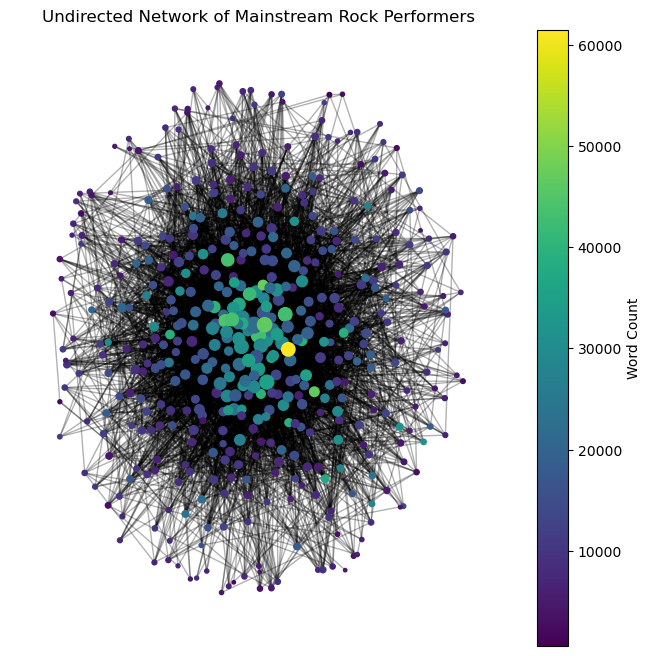

In [2]:
#  Loading the graph from Github as decribed in the exercise

# TODO TJEK at AllMusic ikke er med!!! (se degrees nedenfor))

# load graph from URL
url = r"https://raw.githubusercontent.com/noanorgaard/SocialGraphs/refs/heads/main/Assignment2/Bands_graph.graphml"# Loading graph from a GraphML file from a URL
data = requests.get(url).text  
G = nx.parse_graphml(data)

# load graph from local file
# G = nx.read_graphml(r"/Users/iben/Desktop/Social_graphs/SocialGraphs/Noa/Bands_graph.graphml")

#### BASIC INFO
print(f"Number of nodes in G: {G.number_of_nodes()}")
print(f"Number of edges in G: {G.number_of_edges()}")

### VISULISATION
G_undirected = G.to_undirected()
# plot 
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G_undirected, seed=42, k = 0.8)  # positions for all 
#pos = nx.forceatlas2_layout(GCC_undirected, seed=42, strong_gravity=True)  # positions for all nodes

# node sizes based on degree
node_sizes = [5 + 1 * G_undirected.degree(n) for n in G_undirected.nodes()]

# node colors based on word count (content length)
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)
plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()

Above, the network of mainstream rock performers is displayed. It has 473 nodes and 7452 edges. The size of the node represents the degree, ie. a big node has high degree and a small has low degree. The color of the node represents the word count of the wikipage of the performer, where yellow/green is a longer wiki page and purple/blue is a shorter wiki page. It is evident that the graph is highly connected and it is difficult to see anything specific because of the many edges making everything black. Inspite of this, it is possible to see that the yellow and green nodes are also the ones that are bigger and in the center of the network. Menaing that a band, that has a long wiki-text also has a lot of links (either/or coming from and/or going to).

To further investigate, we look at the in-degree and out-degrees of the nodes. Firstly, we will look at the mean, median, minimum, maximum, mode and distributions. 

In [3]:
# Degree statistics
out_degrees = [d for n, d in G.out_degree()]
in_degrees = [d for n, d in G.in_degree()]

# Out degree statistics
print("\nOut-Degree Statistics:")
print(f"Average Out-Degree: {np.mean(out_degrees)}")
print(f"Median Out-Degree: {np.median(out_degrees)}")
print(f"Minimum Out-Degree: {np.min(out_degrees)}")
print(f"Maximum Out-Degree: {np.max(out_degrees)}")
(unique, counts) = np.unique(out_degrees, return_counts=True)
frequencies = np.asarray((unique, counts)).T
mode_out_degree = frequencies[np.argmax(frequencies[:, 1]), 0]
print(f"Mode Out-Degree: {mode_out_degree}")

# In degree statistics
print("\nIn-Degree Statistics:")
print(f"Average In-Degree: {np.mean(in_degrees)}")
print(f"Median In-Degree: {np.median(in_degrees)}")
print(f"Minimum In-Degree: {np.min(in_degrees)}")
print(f"Maximum In-Degree: {np.max(in_degrees)}")
(unique, counts) = np.unique(in_degrees, return_counts=True)
frequencies = np.asarray((unique, counts)).T
mode_in_degree = frequencies[np.argmax(frequencies[:, 1]), 0]
print(f"Mode In-Degree: {mode_in_degree}")





Out-Degree Statistics:
Average Out-Degree: 15.042372881355933
Median Out-Degree: 13.0
Minimum Out-Degree: 1
Maximum Out-Degree: 69
Mode Out-Degree: 9

In-Degree Statistics:
Average In-Degree: 15.042372881355933
Median In-Degree: 10.0
Minimum In-Degree: 0
Maximum In-Degree: 117
Mode In-Degree: 4


Above we see that for both in and out degrees, the average is greater than the median (13 < 15 and 10 <15), indicating that the distributions are skewed to the left. This is also seen in the plots below. The mode shows, that the most common behavior is that a band page links to 9 other bands but most are only linked to by 4. The max in‑degree (117) is far from the median (10), this again indactes a skewed distribution (power‑law‑like). The out-degree has less of a difference, hereby indicating that it has a lighter tail. 
Below the distributions are plotted investigating further.

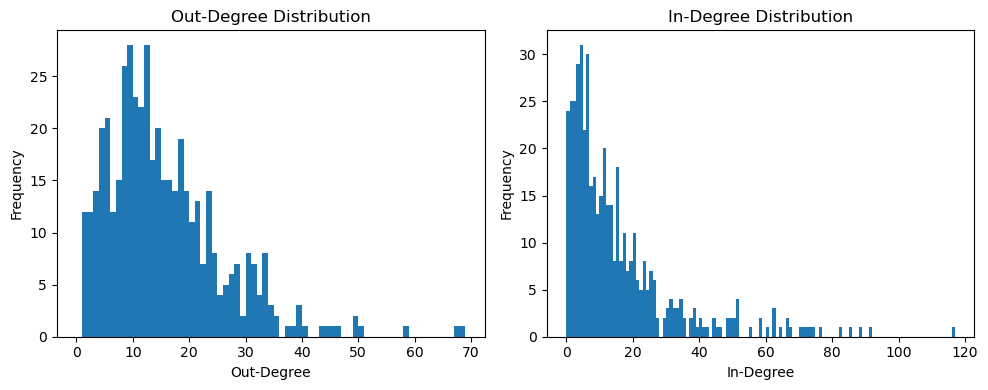

In [4]:

# plot histograms of out degrees and in degrees in 3 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(out_degrees, bins=range(max(out_degrees)+1))
axs[0].set_title('Out-Degree Distribution')
axs[0].set_xlabel('Out-Degree')
axs[0].set_ylabel('Frequency')

axs[1].hist(in_degrees, bins=range(max(in_degrees)+1))
axs[1].set_title('In-Degree Distribution')
axs[1].set_xlabel('In-Degree')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
    

The plots show out-degree (left) and in-degree (right) distributions of the network. The bins are size one on both graphs, the first bin (between 0 and 1 on the x-axis) represents the nodes having in/out degree 0 and so on for the following bins.  

We observe that there is a difference in the out and in degree distributions. The in degree distribution is heavily skewed (power-law like) to the left and the out degree is slightly skewed to the left. The peak is around 10 for the out-degree distribution. The peak of the in-degree distribution is around 5. Furthermore, no nodes have out-degree 0, but many have in-degree 0, meaning no bands does not link to others while many are not linked to. This behavior supports that there is a small group "elite" bands that a lot of the nodes point to, who has a high in-degree. It is worth to note here that we in the preparation of the network have removed all nodes that didn't connect to the largest component, which in this case was the nodes that had both in and out degree 0. From the right plot we see that a handfull of nodes has in-degree higher than 80, with around 20 nodes that has a higher degree than 60.

There are more nodes with low in-degree, than nodes with low out-degree. Which means that many link to more than one other band, while many are not linked to by other bands or only by few. 

This leads use to look at out-degree vs in-degree for the nodes. This we will do in a scatterplot below.


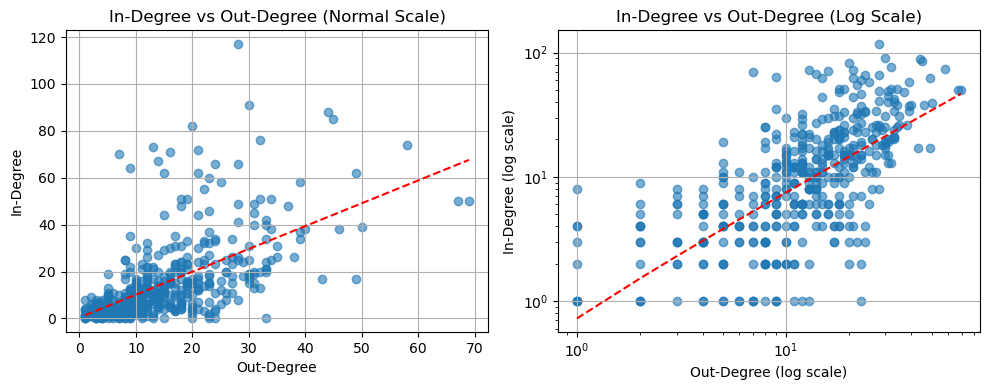

Node with high out-degree and zero in-degree: ['Mötley_Crüe']
Nodes with high in-degree and low out-degree: ['Pink_Floyd', 'Elvis_Presley']


In [5]:
# plot of in-degree vs out-degree scatterplot both in normal and log scale (subplots)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# non log
axs[0].scatter(out_degrees, in_degrees, alpha=0.6)
axs[0].set_xlabel('Out-Degree')
axs[0].set_ylabel('In-Degree')
axs[0].set_title('In-Degree vs Out-Degree (Normal Scale)')
axs[0].grid(True)
# make tendency line
z = np.polyfit(out_degrees, in_degrees, 1)
p = np.poly1d(z)
axs[0].plot(sorted(out_degrees), p(sorted(out_degrees)), "r--")

# log scale
axs[1].scatter(out_degrees, in_degrees, alpha=0.6)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Out-Degree (log scale)')
axs[1].set_ylabel('In-Degree (log scale)')
axs[1].set_title('In-Degree vs Out-Degree (Log Scale)')
axs[1].grid(True)
# make tendency line in log scale
log_out_degrees = np.log1p(out_degrees)
log_in_degrees = np.log1p(in_degrees)
z_log = np.polyfit(log_out_degrees, log_in_degrees, 1)
p_log = np.poly1d(z_log)
sorted_log_out_degrees = np.sort(log_out_degrees)
axs[1].plot(np.expm1(sorted_log_out_degrees), np.expm1(p_log(sorted_log_out_degrees)), "r--")
plt.tight_layout()
plt.show()

# There is one node with high outdegree (above 30) but low indegree (= 0).
# Find this node:
special_node_low_in = [n for n in G.nodes() if G.out_degree(n) > 30 and G.in_degree(n) == 0]

# There is two nodes with in degree above 60 and out degree below 10.
special_nodes_low_out = [n for n in G.nodes() if G.in_degree(n) > 60 and G.out_degree(n) < 10]


print(f"Node with high out-degree and zero in-degree: {special_node_low_in}")
print(f"Nodes with high in-degree and low out-degree: {special_nodes_low_out}")



The scatterplots above displays the indegree vs outdegree for all nodes in the network. The left displays on a normal scale and the right on a log scale (both x and y). A linear tendency is marked with red on both plots.

There’s a general upward trend in the plots. Nodes with larger out‑degree tend to also have higher in‑degree, but with large dispersion, especially as degree grows. The tendency line (red) is very close to y=x, nodes lying near it have similar in‑ and out‑degree. 

In the left plot (normal scale), the nodes are clustered in the bottom left corner, meaning that most nodes have low out or/and in degree. Only a few reach very high values (e.g. in‑degree around 100, out‑degree around 60).
The log–log plot reveals long tails (vertical and horizontal “bands” at degree 1 and small integers), a hallmark of scale‑free–like or at least skewed networks. This we also saw on the distributions.

It is clear on the plots, that there is a band that does link to many bands (above 30) but has no bands linking to them. This we have found to be Mötley Crüe. Furthermore there is two bands, that has many linking to them (above 60) but very few they link to (below 10), these are Pink Floyd and Elvis Presley. 

The first band (with low in-degree and high out-degree) is one we have never heard of, but we have google is a famous heavy metal band. The two bands with opposite degree properties are very known and defining performers. From this it seems like famous bands with extensive wiki pages both have high in- and/or out degree. Therefore we would like to calculate the correlation between the degrees and the word count, to get a better understanding of this. This is done below.


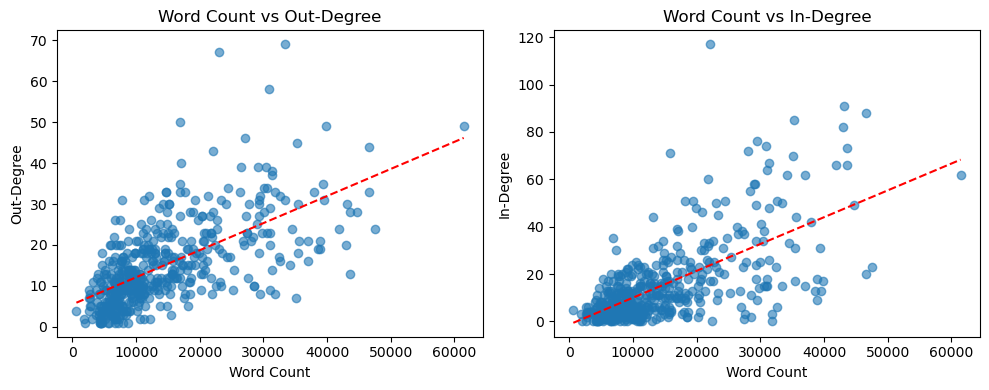

Pearson Correlation between Word Count and Out-Degree: 0.629359941339742
Spearman Correlation between Word Count and Out-Degree: 0.6657751911850595 

Pearson Correlation between Word Count and In-Degree: 0.6518429051498351
Spearman Correlation between Word Count and In-Degree: 0.6129146791513196


In [6]:
# get word counts of all nodes in G
word_counts = [G.nodes[n]['word_count'] for n in G.nodes()]

# subplot word count vs out degree
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].scatter(word_counts, out_degrees, alpha=0.6)
axs[0].set_xlabel('Word Count')
axs[0].set_ylabel('Out-Degree')
axs[0].set_title('Word Count vs Out-Degree')
# tendency line
z = np.polyfit(word_counts, out_degrees, 1)
p = np.poly1d(z)
axs[0].plot(sorted(word_counts), p(sorted(word_counts)), "r--")

# subplot word count vs in degree
axs[1].scatter(word_counts, in_degrees, alpha=0.6)
axs[1].set_xlabel('Word Count')
axs[1].set_ylabel('In-Degree')
axs[1].set_title('Word Count vs In-Degree')
# tendency line
z = np.polyfit(word_counts, in_degrees, 1)
p = np.poly1d(z)
axs[1].plot(sorted(word_counts), p(sorted(word_counts)), "r--")
plt.tight_layout()
plt.show()

# pearson correlation (out-degree)
pearson_correlation_out = stats.pearsonr(word_counts, out_degrees)[0]
spearman_correlation_out = stats.spearmanr(word_counts, out_degrees)[0]
print(f"Pearson Correlation between Word Count and Out-Degree: {pearson_correlation_out}")
print(f"Spearman Correlation between Word Count and Out-Degree: {spearman_correlation_out} \n")

# pearson correlation (in-degree)
pearson_correlation_in = stats.pearsonr(word_counts, in_degrees)[0]
spearman_correlation_in = stats.spearmanr(word_counts, in_degrees)[0]
print(f"Pearson Correlation between Word Count and In-Degree: {pearson_correlation_in}")
print(f"Spearman Correlation between Word Count and In-Degree: {spearman_correlation_in}")


The plots above show the word-count vs the out-degree (left) and in-degree (right). A tendency line is shown as a red line on both plots. 

We observed that theres is a strong association between the wiki page length (word count) and both Out‑Degree and In‑Degree. Which the stated strong correlations also support. Neither of the degrees are particular more correlated with word-count than the other. This was also what we observed in the initial plot of the network above, where the wordcount was indicated on a color scale and the degree was indicated in the size of the node.

The correlation with out-degree, makes sense as longer articles usually have richer history/association sections and discographies, producing more links to other wiki pages and hereby also other  performers. Motley crue, is an example of this, a famous band with a long wikipage with details and many links.  
The correlation with in-degree, makes sense as very influential artists attract more references from peer pages. They also tend to have richer coverage and hereby longer pages. Word count seems a proxy for prominence/coverage, which also draws more incoming links and provides more opportunities to link out.

Now lets look at which bands/performers are the most important in the network. This is done by looking at degree centrality and betweenness centrality.


In [7]:
# 10 most central characters according to degree centrality.
degree_centrality = nx.degree_centrality(G)
sorted_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
top_10_central = sorted_centrality[:10]
print("Top 10 most central characters by degree centrality:")
for character, centrality in top_10_central:
    print(f"{character}: {centrality}")

# 10 most central characters according to betweenness centrality.
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_10_betweenness = sorted_betweenness[:10]
print("\n")
print("Top 10 most central characters by betweenness centrality:")
for character, centrality in top_10_betweenness:
    print(f"{character}: {centrality}")

Top 10 most central characters by degree centrality:
Led_Zeppelin: 0.3078556263269639
Black_Sabbath: 0.2802547770700637
Queen__band_: 0.2802547770700637
Metallica: 0.2760084925690021
Bob_Dylan: 0.25690021231422505
Alice_in_Chains: 0.2526539278131635
Deep_Purple: 0.2484076433121019
Guns_N'_Roses: 0.2356687898089172
Jimi_Hendrix: 0.22929936305732485
David_Bowie: 0.21656050955414013


Top 10 most central characters by betweenness centrality:
Deep_Purple: 0.04288744233729137
Queen__band_: 0.04129527787350089
Guns_N'_Roses: 0.03745295495016443
Alice_in_Chains: 0.03576269489924573
Jimi_Hendrix: 0.03389112672769049
Black_Sabbath: 0.033688189929592306
Led_Zeppelin: 0.031621525006454036
Bob_Dylan: 0.028798304032036582
Metallica: 0.02577000515013545
Alice_Cooper: 0.025446990378799963


Fristly, we look at the most important performers in terms of degree centrality. These are the nodes referenced by many and/or referencing to many others. It is eveident that classic rock giants dominate, which makes sense given their historical influence and frequent mentions. These artists have the most direct connections (sum of in-degree and out-degree normalized).
In contrast, the betweenness measures how often a node (performer) lies on the shortest paths between other nodes, i.e. how many times they have a “bridge” role.

Deep Purple and Queen are not only well-connected (high deg. centrality) but they also act as connectors between subgroups, this could be subgroups in terms of genres or eras.

Led Zeppelin and Black Sabbath rank highest in degree but lower in betweenness, this suggests they are the biggest hubs but not necessarily as important bridges. We see that Alice in Chains and Guns N' Roses are on the betweenness list, which suggests some bridging between classic rock and later subgenres (grunge, hard rock).

Classic rock and early metal dominate both lists, showing their central role in mainstream rock (reflected by the structure of the links of their wikipages). 

Looking at the wikipages of the bands on the btweenness list, most of them have exprimented with different subgenres of rock music or have collaborated with bands in different styles.  

The normalized values (0.30 for degree, 0.04 for betweenness) suggest moderate centralization. There is no single node dominating completely.

It would be interesting to look at these dominating nodes, with high degree centrality, if they are linking to each other. Therefore, we will look at the assortativity in the network. 

In [8]:
# Assortativity coefficient of the undirected graph with respect to degree
assortativity_coefficient = nx.degree_assortativity_coefficient(G.to_undirected())
print(f"\nAssortativity coefficient of the undirected graph with respect to degree: {assortativity_coefficient}")
# Assortativity coefficient of the directed graph with respect to word_count
word_count_assortativity = nx.attribute_assortativity_coefficient(G.to_undirected(), 'word_count')
print(f"Assortativity coefficient of the directed graph with respect to word_count: {word_count_assortativity} \n")

# Assortativity coefficient of the highest degree nodes
highest_degree_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]
subgraph = G.subgraph([n for n, d in highest_degree_nodes])
highest_degree_assortativity = nx.degree_assortativity_coefficient(subgraph.to_undirected())
print(f"Assortativity coefficient of the highest degree nodes: {highest_degree_assortativity}") 
# Assortativity coefficient of the lowest degree nodes
lowest_degree_nodes = sorted(G.degree(), key=lambda x: x[1])[:100]
subgraph_low = G.subgraph([n for n, d in lowest_degree_nodes])
lowest_degree_assortativity = nx.degree_assortativity_coefficient(subgraph_low.to_undirected())
print(f"Assortativity coefficient of the lowest degree nodes: {lowest_degree_assortativity}")
# Assortivity of middle degree nodes with degree between 25th and 75th percentile
middle_degree_nodes = sorted(G.degree(), key=lambda x: x[1])[len(G)//4:3*len(G)//4]
subgraph_mid = G.subgraph([n for n, d in middle_degree_nodes])
middle_degree_assortativity = nx.degree_assortativity_coefficient(subgraph_mid.to_undirected())
print(f"Assortativity coefficient of the middle degree nodes: {middle_degree_assortativity} \n")

# Assortativity coefficient of the nodes with highest word count
highest_word_count_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['word_count'], reverse=True)[:10]
subgraph_wc = G.subgraph([n for n, d in highest_word_count_nodes])
highest_word_count_assortativity = nx.attribute_assortativity_coefficient(subgraph_wc.to_undirected(), 'word_count')
print(f"Assortativity coefficient of the nodes with highest word count: {highest_word_count_assortativity}")
# Assortativity coefficient of the nodes with lowest word count
lowest_word_count_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['word_count'])[:100]
subgraph_wc_low = G.subgraph([n for n, d in lowest_word_count_nodes])
lowest_word_count_assortativity = nx.attribute_assortativity_coefficient(subgraph_wc_low.to_undirected(), 'word_count')
print(f"Assortativity coefficient of the nodes with lowest word count: {lowest_word_count_assortativity}")
# Assortivity of middle word count nodes with word count between 25th and 75th percentile
middle_word_count_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['word_count'])[len(G)//4:3*len(G)//4]
subgraph_wc_mid = G.subgraph([n for n, d in middle_word_count_nodes])
middle_word_count_assortativity = nx.attribute_assortativity_coefficient(subgraph_wc_mid.to_undirected(), 'word_count')
print(f"Assortativity coefficient of the middle word count nodes: {middle_word_count_assortativity}")


Assortativity coefficient of the undirected graph with respect to degree: 0.0045703090953323686
Assortativity coefficient of the directed graph with respect to word_count: -0.00346922370720667 

Assortativity coefficient of the highest degree nodes: -0.1328577797592491
Assortativity coefficient of the lowest degree nodes: -0.19828815977175424
Assortativity coefficient of the middle degree nodes: 0.08123404639607505 

Assortativity coefficient of the nodes with highest word count: -0.11920529801324505
Assortativity coefficient of the nodes with lowest word count: -0.020315617631053877
Assortativity coefficient of the middle word count nodes: -0.005993974860625368


The calculations above are done on the undirected version of the network.

The assortiative coefficient of the whole network is calculated above (first section) with respect to degree and word count. We oberseve that the network is neutral with respect to both degree and word count, as the values are very close to zero. This means that links are roughly random with respect to degree/word count similarity. 

Furthermore, we have looked at the subgraphs to see the behavoir between nodes of similar degree and word count (section 2 and 3 above respectively).

Firstly looking at assortivity with respect to degree. In the subgraph, containing only the nodes with the 10 highest degrees, the coefficient is -0.13, i.e. the subgraph is disassortative. This means that the biggest hubs do not mostly link to other hubs, i.e. they mostly connect downward to lower‑degree nodes. There is no tight “club” between the highest degree nodes (hub-and-spoke). Looking at the 100 lowest degree nodes, the subgraph has coefficient -0.19, i.e. this subgraph is also disassortative. Low‑degree bands tend to attach upward to higher‑degree bands rather than to each other. Lastly, in the subgraph of the nodes with degree in the 25th and 75th percentile, the coefficient is 0.08, slightly possitive. Hereby they have a slight tendency to link to nodes of same degree. 
Put together, this explains why the overall coefficient is almost 0. The top and the bottom are both mildly disassortative and their effects largely cancel once you include the middle of the distribution, wich is slightly assortative.

Secondly looking at assortativity with respect to the word count, all three subgraphs (10 highest, 100 lowest, 25th-75th precentile) have negative or close to 0 coefficient. The top-10 (the moste extensive wikipages of bands) is disassortative while the others are neutral, meaning the high word count pages have a tendency to connect to nodes of lower and mid word count pages don’t show strong linking preferences among themselves. This hereby, explains the overall coefficient is almost 0, Only the very top has linking preference while the majority of the network does not.


Finally, we want to make a better visualization of the graph, by plotting the network backbone (removing less important nodes and edges). This way we have a better understanding of the structure. 

Number of nodes in backbone: 248
Number of edges in backbone: 209


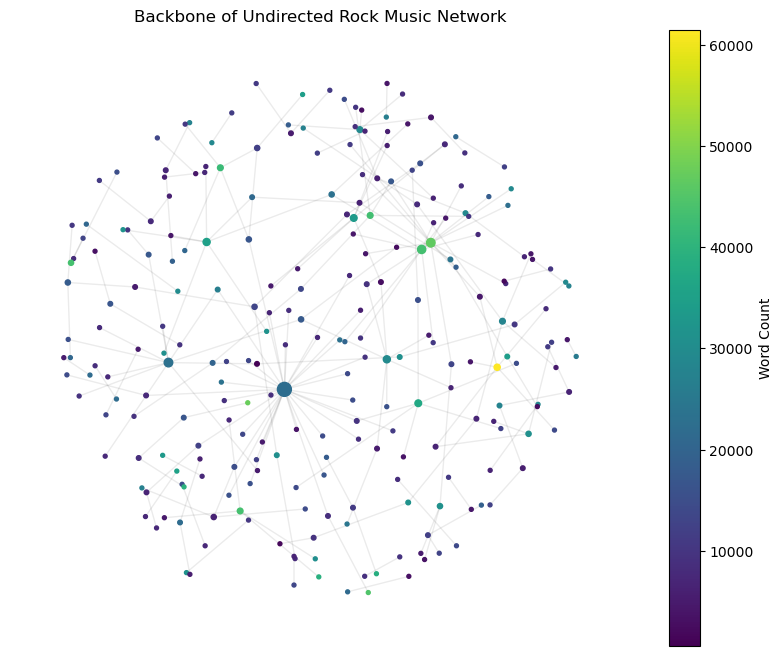

Top 5 edges with highest weights in the backbone:
Edge (Elvis_Presley, Shakin'_Stevens) with weight: 100.0
Edge (Billy_Idol, Tommy_James_and_the_Shondells) with weight: 100.0
Edge (Roxy_Music, The_Fixx) with weight: 100.0
Edge (Guns_N'_Roses, The_Presidents_of_the_United_States_of_America__band_) with weight: 99.99999999999997
Edge (Bob_Dylan, Michael_Martin_Murphey) with weight: 88.23424026288316

Top 5 hubs in the backbone (nodes with highest degree):
Node Led_Zeppelin with degree: 32
Node Queen__band_ with degree: 11
Node Deep_Purple with degree: 11
Node Bob_Dylan with degree: 10
Node Jimi_Hendrix with degree: 7


In [9]:
# Creating Weighted Network 1, where edge weights are proportional to edge betweenness centrality
G_undirected_1 = G.to_undirected()
# compute edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G_undirected_1)
# normalize edge betweenness to [1, 100]
min_eb = min(edge_betweenness.values())
max_eb = max(edge_betweenness.values())
def renormalize(value, min_val, max_val):
    return 1 + (value - min_val) * (100 - 1) / (max_val - min_val)
for u, v in G_undirected_1.edges():
    G_undirected_1[u][v]['weight'] = renormalize(edge_betweenness.get((u, v), 0), min_eb, max_eb)


# Disparity Filter method, using edge weights.
def disparity_filter(G, alpha=0.05):
    backbone = nx.Graph()
    for node in G.nodes():
        k = G.degree(node)
        if k > 1:
            sum_w = sum([G[node][nbr]['weight'] for nbr in G.neighbors(node)])
            for nbr in G.neighbors(node):
                p_ij = G[node][nbr]['weight'] / sum_w
                alpha_ij = (1 - p_ij) ** (k - 1) 
                if alpha_ij < alpha: 
                    backbone.add_edge(node, nbr, weight=G[node][nbr]['weight'])
                    backbone.nodes[node]['word_count'] = G.nodes[node]['word_count'] # for plotting later
                    backbone.nodes[nbr]['word_count'] = G.nodes[nbr]['word_count'] # for plotting later
    return backbone


backbone1 = disparity_filter(G_undirected_1, alpha=0.07)
print(f"Number of nodes in backbone: {backbone1.number_of_nodes()}")
print(f"Number of edges in backbone: {backbone1.number_of_edges()}")
# Visualize the backbone
plt.figure(figsize=(10,8))
pos = nx.spring_layout(backbone1, seed=42, k = 0.8)
# node sizes based on degree
node_sizes = [5 + 3 * backbone1.degree(n) for n in backbone1.nodes()]
# node colors based on word count (content length)
node_colors = [backbone1.nodes[n]['word_count'] for n in backbone1.nodes()]
nodes = nx.draw_networkx_nodes(backbone1, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(backbone1, pos, alpha=0.08)
plt.colorbar(nodes, label='Word Count')
plt.title('Backbone of Undirected Rock Music Network')
plt.axis('off')
plt.show()


# Find the top 5 edges with highest weights in the backbone
top_5_edges = sorted(backbone1.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:5]
print("Top 5 edges with highest weights in the backbone:")
for u, v, data in top_5_edges:
    print(f"Edge ({u}, {v}) with weight: {data['weight']}") 

# Find the big hubs in the backbone (nodes with highest degree)
top_5_hubs = sorted(backbone1.degree(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 hubs in the backbone (nodes with highest degree):")
for node, degree in top_5_hubs:
    print(f"Node {node} with degree: {degree}")




The above figure is the backbone of the undirected mainstream rock music network (248 nodes and 209 edges), extracted using the Disparity filter with edge weights proportional to edge betweenness centrality (normalized to be between 1 and 100). The backbone only consist of edges that are significant for at least one endpoint. This graph emphasizes ties that carry shortest‑path flow. The node sizes reflects the degree of the node. Node color reflects the word count (yellow = longer pages, purple = shorter). 

Because the edge weights are proportional to edge betweenness, the disparity filter preferentially keeps inter‑community links. These are the links that carry a disproportionate share of shortest‑path flow for at least one of the endpoints. We see that there are a few bridging hubs (top 5 five are listed above) in the structure which aligns with the assortativity analysis above (mildly disassortative among the biggest nodes). Especially one hub, Led Zepplin, has a high degree in the backbone acting as a main connector.

Furthermore, we have printed the edges with the highest betweeness centrality (normalized), see the list above. Here we see that the links (Elvis - Shakin' Stevens), (Billy Idol - Tommy James and the Shondells), (Roxy Music - The Fixx) and (Guns N' Roses - The Presidents of the United States of America) are links critical for shortest-path connectivity. They likely represent genre and/or linkings that otherwise are quite seperate communities. 


----

# Part 2: Genres and communities and plotting
The questions below are based on Lecture 7, part 2.
- Write about genres and modularity
- Detect the communities, discuss the value of modularity in comparison to the genres.
- Plot the communities and comment on your results.
- Calculate the matrix $D$ and discuss your findings.
------

## Write about genres and modularity

Modularity is a measure that evaluates how well a network partitioning devides the network into communities. It does this by comparing the density of edges inside the communities vs the density between the communites. 
A high moduality means that the nodes of the communities are highly connected and there are few connections between the communities. A modularity of 1 means that there are only edges inside communities and no edges between communities, i.e. communities are perfectly seperated. A low modularity, around 0, means that there is no more community structure than there would be in a random network. Modularity can also be negative, and this means that the community structure is weaker than if the network had been random.

When we group/partition nodes based on genre, the modularity measure tells us something about if the bands that play the same genre music often will link to each other, or do they often link across genres. A high modularity would suggest that for instance pop-rock bands link primarily to other pop-rock bands.

## Detect the communities, discuss the value of modularity in comparison to the genres

As in part 1, we are using the network of mainstream rock performers.

To detect communities we firstly create a network of all the bands where an attribute on each node is all the genres listed in their wiki-infobox. To be able to compare and group the bands later we will add the genres in lowercase and normalize the genre names, e.g. "R&B"->"rhythm and blues" etc. We have also chosen to remove the qualifiers of genres stating if the genre is "(early)" or "(later)" to make fewer categories and see stronger patterns.

In the following code we have created the functions to detect the genres inside the infoboxes of the plain wiki-text of the bands, and a function to clean the found genres. This is made using an LLM, as we did in the exercises from week 7.

In [10]:
def extract_genres_from_wikitext(wikitext_content):
    """
    Extract a cleaned, normalized list of genres from Wikipedia-like wikitext.
    - Removes refs, citation templates, wrapper templates, HTML, and wiki links.
    - Strips all parenthetical qualifiers (e.g., '(early)', '(late)') and broken tails.
    - Lowercases all genres.
    - Normalizes common variants (rock & roll, r&b, hip-hop, post punk, synth pop, etc.).
    - Drops obvious template/config noise.
    - Deduplicates while preserving order.
    """
    # Isolate the 'genre =' field in the infobox
    m = re.search(
        r'\|\s*genre\s*=\s*(.*?)(?=\n\s*\||\n}})',
        wikitext_content,
        flags=re.DOTALL | re.IGNORECASE
    )
    if not m:
        return []
    g = m.group(1)

    # Decode HTML entities (&lt;ref&gt; -> <ref>, &amp; -> &, etc.)
    g = html.unescape(g)

    # Remove HTML comments
    g = re.sub(r'<!--.*?-->', '', g, flags=re.DOTALL)

    # Remove references: self-closing BEFORE paired to avoid cross-line capture
    g = re.sub(r'<ref[^>]*/>', '', g, flags=re.DOTALL | re.IGNORECASE)                      # <ref .../>
    g = re.sub(r'<ref(?:(?!/>)[^>])*?>.*?</ref>', '', g, flags=re.DOTALL | re.IGNORECASE)   # <ref ...>...</ref>

    # Remove citation/footnote templates entirely
    g = re.sub(r'\{\{\s*cite[^{}]*\}\}', '', g, flags=re.IGNORECASE)                        # {{cite web|...}}
    g = re.sub(r'\{\{\s*harv-?nb?[^{}]*\}\}', '', g, flags=re.IGNORECASE)                   # {{harvnb}}, {{harv-nb}}
    g = re.sub(r'\{\{\s*(sfn|sfnb|efn|refn)[^{}]*\}\}', '', g, flags=re.IGNORECASE)         # {{sfn}}, {{refn}}, etc.
    g = re.sub(r'\{\{\s*(citation needed|cn)[^{}]*\}\}', '', g, flags=re.IGNORECASE)        # {{citation needed}}, {{cn}}

    # Drop wrapper templates but keep their inner content
    g = re.sub(r'\{\{\s*(flatlist|hlist|nowrap|plainlist|ubl|unbulleted list)\s*\|?', '',
               g, flags=re.IGNORECASE)

    # Remove remaining braces and HTML tags like <small>, <i>, etc.
    g = g.replace('{{', '').replace('}}', '')
    g = re.sub(r'<[^>]+>', '', g)

    # Replace wiki links [[A|B]] -> B; [[A]] -> A
    g = re.sub(r'\[\[(?:[^|\]]+\|)?([^\]]+)\]\]', r'\1', g)

    # Normalize whitespace (incl. NBSP) and bullets
    g = g.replace('\xa0', ' ')
    g = g.replace('*', ' ')

    # Split on common delimiters
    parts = re.split(r'[\n,;•·]+|\s*\|\s*', g)

    # --- Normalization helpers ---

    # Canonical mapping for near-duplicates and synonyms (all keys/values lowercase)
    CANON_MAP = {
        # rock and roll family
        "rock & roll": "rock and roll",
        "rock and roll": "rock and roll",
        "rock 'n' roll": "rock and roll",
        "rock ’n’ roll": "rock and roll",
        "rock `n` roll": "rock and roll",

        # r&b / rhythm & blues
        "r&b": "rhythm and blues",
        "r & b": "rhythm and blues",
        "rhythm & blues": "rhythm and blues",

        # hip hop
        "hip-hop": "hip hop",
        "hip–hop": "hip hop",

        # hyphen/space variants
        "post punk": "post-punk",
        "synth pop": "synth-pop",
        "dance rock": "dance-rock",
        "blue eyed soul": "blue-eyed soul",

        # AOR
        "aor": "album-oriented rock",
    }

    # Regexes for pattern families
    ROCKNROLL_RX = re.compile(r"rock\s*(?:&|and|['`´’]\s*n['`´’])\s*roll")
    HIPHOP_RX    = re.compile(r"hip\s*[-–]?\s*hop")
    RAND_B_RX    = re.compile(r"(?:^|\b)r\s*&\s*b(?:\b|$)|rhythm\s*&\s*blues")

    # Token acceptability: letters (incl. accents), numbers, space, hyphen, apostrophes/quotes, ampersand, dots
    ALLOWED_RX   = re.compile(r"^[0-9A-Za-zÀ-ÖØ-öø-ÿ\s\-\&'`´’\.]+$")

    # Substrings indicating template/config noise to drop
    DROP_SUBSTRS = [
        'citation', 'cite', 'access-date', 'archive-url', 'archive-date',
        'publisher=', 'website=', 'title=', 'url=', 'first=', 'last=',
        'class=', 'nowrap', 'italic', 'lang', 'script=', 'format='
    ]

    def normalize_label(t: str) -> str:
        # Trim punctuation
        t = t.strip()
        t = re.sub(r'^[\W_]+|[\W_]+$', '', t)
        if not t:
            return ''

        # Drop obvious noise
        lo = t.lower()
        if any(s in lo for s in DROP_SUBSTRS):
            return ''

        # Remove any parenthetical parts, even if multiple (e.g., "(early)", "(later)")
        t = re.sub(r'\s*\([^)]*\)', '', t).strip()
        # If an unmatched '(' tail remains, drop that too (e.g., "funk metal (early")
        t = re.sub(r'\s*\([^)]*$', '', t).strip()

        # Lowercase
        t = t.lower()

        # Normalize rock and roll forms
        if ROCKNROLL_RX.search(t):
            t = ROCKNROLL_RX.sub('rock and roll', t)

        # Normalize hip hop forms
        if HIPHOP_RX.search(t):
            t = HIPHOP_RX.sub('hip hop', t)

        # Normalize r&b / rhythm & blues
        if RAND_B_RX.search(t):
            t = 'rhythm and blues'

        # Apply canonical map (covers aor, synth-pop, post-punk, blue-eyed soul, dance-rock, etc.)
        t = CANON_MAP.get(t, t)

        # Reject invalid tokens (after normalization)
        if not ALLOWED_RX.match(t):
            return ''

        # Collapse repeated spaces and strip stray punctuation
        t = re.sub(r'\s{2,}', ' ', t).strip('. ').strip()

        return t

    cleaned = [normalize_label(p) for p in parts]
    cleaned = [c for c in cleaned if c]

    # Deduplicate while preserving order (already lowercase)
    out, seen = [], set()
    for x in cleaned:
        if x not in seen:
            seen.add(x)
            out.append(x)
    return out

In the following we loop through all wiki-texts of bands in a directory and make a dictionary of the bands and their genres.

In [11]:

# Directory where all band data files are located
data_directory = "Bands"
band_genres = {}

# if data_directory folder not found load from txt file
if not os.path.exists(data_directory):
    url = r"https://raw.githubusercontent.com/noanorgaard/SocialGraphs/refs/heads/main/Assignment2/band_genres.txt"
    data = requests.get(url).text
    # Process the downloaded data
    for line in data.strip().split('\n'):
        if ':' in line:
            band_name, genres_str = line.strip().split(":", 1)
            # The genres are comma-separated, but some might be empty strings if the line ends with a comma
            genres = [genre.strip() for genre in genres_str.split(",") if genre.strip()]
            band_genres[band_name] = genres
else:
    # Iterate over all files in the specified directory
    for filename in os.listdir(data_directory):
        file_path = os.path.join(data_directory, filename)
        band_name = os.path.splitext(filename)[0] # Get band name from filename

        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read()
                genres = extract_genres_from_wikitext(content)
                band_genres[band_name] = genres
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# order the band list alphabetically
band_genres = dict(sorted(band_genres.items()))


For the TA's we have left this code above, such that it is possible to see how we constructed the graph with the genres as attributes. But the bands are actually loaded from the txt file, which is created from the dictionary above

The top 15 genres are listed below in a histogram

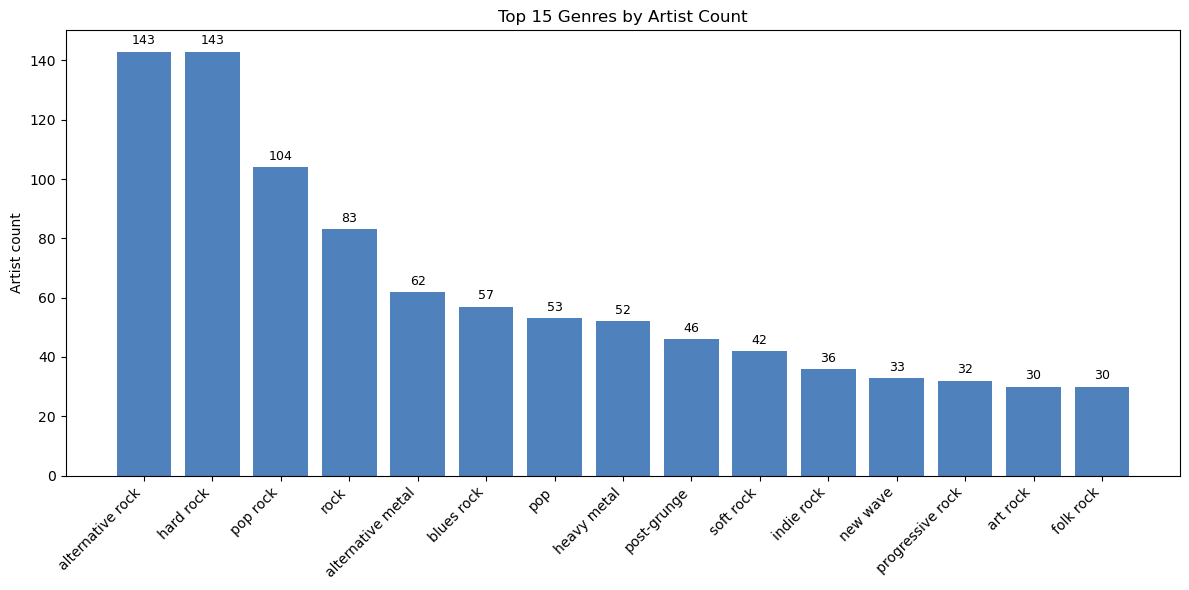

In [12]:
# Artists with at least one genre
artists_with_genres = {artist: genres for artist, genres in band_genres.items() if genres}

# Top-15 genres histogram (by artist counts)

# Count per genre (ensures an artist counted only once per genre even if duplicates slipped in)
genre_to_artists = defaultdict(set)
for artist, genres in artists_with_genres.items():
    for g in set(genres):  # set() to be safe against accidental duplicates
        genre_to_artists[g].add(artist)

genre_counts = Counter({g: len(artist_set) for g, artist_set in genre_to_artists.items()})

top_n = 15
top15 = genre_counts.most_common(top_n)

# Plot
if top15:
    genres_plot, counts_plot = zip(*top15)
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(genres_plot)), counts_plot, color="#4F81BD")
    plt.xticks(range(len(genres_plot)), genres_plot, rotation=45, ha='right')
    plt.ylabel("Artist count")
    plt.title(f"Top {top_n} Genres by Artist Count")
    # Add value labels on bars
    for bar, val in zip(bars, counts_plot):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts_plot)*0.01,
                 str(val), ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()
else:
    print("No genres to plot for histogram (top15 is empty).")

Above we have on the y-axis the frequency/the number of bands that have the genre on the x-axis as one of their listed genres in their wiki-infobox. It is worth to note that a lot of these genres are rock sub-genres, but we have chosen not to join these genres into one and keep them seperated. 

We see that the band/performer pool is dominated by the alternative rock and hard rock genre. Pop rock and rock are also heavily represented. Metal is also represented in the histogram with subgenres alternative and heavy, having 62 and 52 counts respectively. 


We would now like to explore how community-like the communities are, if we consider the genres to be community labels. We use the modularity measure to do this. We firstly create the undirected links between the bands and we only keep the bands that actually have infoboxes and have a genre list in their wiki-text. The links between bands are added using the graph constructed for Assignment 1 (the one also used in part 1).

Removed 15 nodes with no links. The graph now has 457 nodes and 5569 edges.


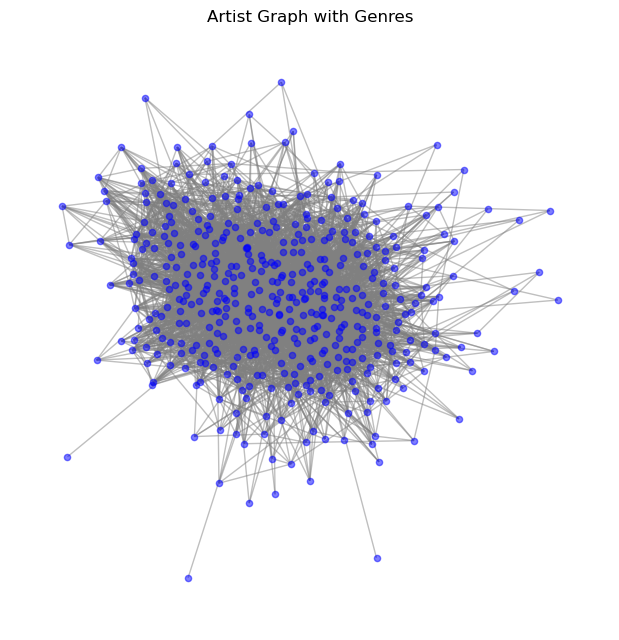

In [13]:
# Create an empty graph
G_artists = nx.Graph()

# Add nodes to the graph from the artists_with_genres
# The keys of the dictionary are the artist names (nodes)
# The values are the lists of genres (attributes)
for artist, genres in artists_with_genres.items():
    G_artists.add_node(artist, genres=genres)

# Load the original links graph from Assignment 1 (also used in part 1 of this assignment)
G_links = G.copy()
# Adding edges to G_artists based on G_links
G = G_artists.copy()

for u, v in G_links.edges():
    if G.has_node(u) and G.has_node(v):
        G.add_edge(u, v)

# NOTE: G is now our final graph with genres as node attributes and the links are the original links from Assignment 1 and all nodes are removed that has no info-box

# Remove nodes with no links
nodes_to_remove = [node for node in G.nodes() if G.degree(node) == 0]
G.remove_nodes_from(nodes_to_remove)
print(f"Removed {len(nodes_to_remove)} nodes with no links. The graph now has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes
nx.draw(G, pos, node_size=20, node_color='blue', edge_color='gray', alpha=0.5)
plt.title("Artist Graph with Genres")
plt.show()


Above we have chosen to remove the bands/nodes that doesn't have any links, as these could contribute to the modularity measure being misleading. This is because isolated nodes have no edges, so they do not contribute to community structure. These nodes will likely be assigned to their own “community” by most algorithms. When we later try to create louvain communities this will most likely create many tiny communities, lowering modularity and making the network look fragmented.

To create the partitioning we choose the first genre in the list as the label for the node/band. This makes each community be the group of nodes that share the same first genre in their list of genres. We then calculate the modularity according to Eq. 9.12 in the book.

In [14]:
# Each node is assigned to the community of its first listed genre
communities_by_genre = defaultdict(list)
for node, data in G.nodes(data=True):
    genres = data.get('genres')
    if genres:
        first_genre = genres[0]
        communities_by_genre[first_genre].append(node)

# a list of sets (the communities).
partition = [set(nodes) for nodes in communities_by_genre.values()]

def modularity(G, partition):
    """
    Compute modularity using Eq. 9.12:
    """
    L = G.number_of_edges()  # total edges
    degrees = dict(G.degree())

    M = 0.0
    for community in partition:
        # Internal edges in community
        L_c = G.subgraph(community).number_of_edges()
        # Sum of degrees in community
        k_c = sum(degrees[node] for node in community)
        M += (L_c / L) - (k_c / (2 * L)) ** 2

    return M

# Calculate and report the modularity 
mod = modularity(G, partition)
print(f"\nCreated a partition with {len(partition)} communities based on the first genre.")
print(f"Modularity: {mod:.4f}")


Created a partition with 77 communities based on the first genre.
Modularity: 0.0944


From the modularity we can conclude that the genres are not good communities. 
A score near or below zero indicates the partitioning is no better than random. In our case (with a modularity of 0.0944) this means that there is no community based on the first genre in the list compared to how the bands link to each other on their wiki-pages. It indicates that there is substantial cross-genre linking in the network, reducing the density difference between intra-genre and inter-genre edges. This may be cause by the fact that many of the bands/performers have multiple genres and the "first genre" communities oversimplifies the reality. 

We also assume that a lot of links are based on collaborations, influnce and historical context, which probably does not nessecarily make the links stay inside the comunnities. 

We have chosen to make anpother partisioning, to compare with. 
Instead of choosing the first genre as the base for the partitioning, we instead choose a random genre. It might improve/worsen the community structure.

In [15]:
random.seed(42)

communities_by_genre_rand = defaultdict(set)

for node, data in G.nodes(data=True):
    genres = data.get('genres') or []
    if not genres:
        continue
    chosen = random.choice(genres)  # uniform random choice among available genres
    communities_by_genre_rand[chosen].add(node)

# Remove empty sets and return as list of sets
partition_rand = [nodes for nodes in communities_by_genre_rand.values() if nodes]

M_rand = modularity(G, partition_rand)
print(f"Random-genre partition modularity: {M_rand:.4f}")

Random-genre partition modularity: 0.0365


For this partitioning, the modularity is 0.0365. Again, the random choosing of genre for each band also produces very low modularity in the network. This was expected. 

Looking at both measures, the "first genre" partitioning is almost a factor 3 higher than the "random genre". Even though they both have low modularity, this does suggest that the first genre in the infoboxes is not arbitrary, it does capture some structure. Though it is important to say, that this structure is weak.

Hereby, we can conclude that the first listed genre is a weak predictor of network connectivity. This could potentially be because many bands does not only have one genre but many. Furthermore, picking a random genre fro the bends list only dilutes structure further. This indicates that the primary genere of bands/performers is usually listed first. 

Note that we have only done one random picking, which means we do not know how much the partitioning modularity can/will vary between random picks and what the mean value is. We have only looked at a single instance. 

## Plot the communities and comment on your results

We will now use the Louvain-algorithm to find communities for the network.

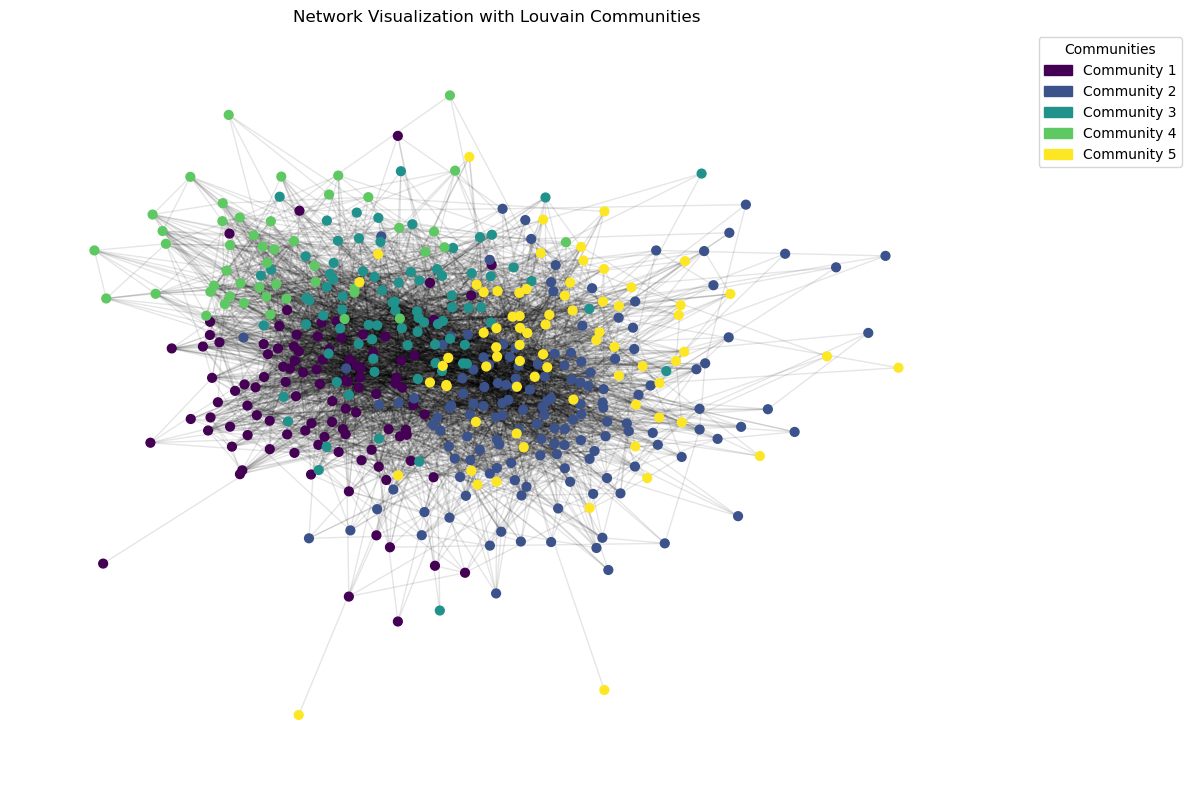


Louvain method found 5 communities with a modularity of 0.3390.


In [16]:
# using networkx louvain_communities to find communities
louvain_communities = list(nx.community.louvain_communities(G, seed=11))
louvain_modularity = nx.community.modularity(G, louvain_communities)

# visualize the network using the Force Atlas algorithm with communities colored differently
# using louvain_communities
partition = {}
for i, community in enumerate(louvain_communities):
    for node in community:
        partition[node] = i


# Set the size of the plot
plt.figure(figsize=(12, 8))
# Compute the layout using spring layout (Force Atlas-like)
pos = nx.spring_layout(G, seed=42)
# Draw nodes with colors based on their community
cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.1)
# We will create custom legend handles because networkx doesn't do it automatically
legend_handles = []
for i in range(len(louvain_communities)):
    legend_handles.append(Patch(color=cmap(i), label=f'Community {i+1}'))

plt.legend(handles=legend_handles, title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Network Visualization with Louvain Communities")
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"\nLouvain method found {len(louvain_communities)} communities with a modularity of {louvain_modularity:.4f}.")

Above is a network visualization of the mainstream rock performers with communities detected using the Louvain algorithm.
Nodes are colored by their assigned community and edges represent the links between the wikipages of the bands/performers. 

The Louvain partitioning identifies five major communities. We observe that the nodes (bands) are largely grouped by color, indicating that the Louvain communities are visually distinct in the network. For example, the purple community (Community 1) is concentrated in the southwest region of the graph, while the green community (Community 4) is in the northwest region.
This partitioning has modularity 0.339, which indicates strong community structure. The Louvain method group nodes based on actual link patterns, not the strict first genre labels. This produced far more cohesive clusters, also capturing collaborations, influence and historical context of the bands.

When we rerun the Louvain algorithm with a different random seed, the number of detected communities can change, as the Louvain algorithm is a heuristic algorithm. For instance, if the method produces only 4 communities instead of more, this could be because the yellow and dark blue communities (Communities 5 and 2) are merged. This makes sense visually, as these two clusters overlap significantly. Similarly, the turquoise community (Community 3), which sits near the center of the network and overlaps with multiple other communities, might be split and redistributed across neighboring clusters in such cases.

The partitioning is now much more community-like now, as the moduality is higher 0.3390. This suggest a moderate community structure and that that there is a community structure in the partitioning compared to a random linking or the before seen genre based partitioning.

We will now create and visualize the confusion matrix comparing the Louvain communities with music genres

## Calculate the matrix $D$ and discuss your findings

We will now compare the communities found by the Louvain algorithm with the music genres by creating a matrix D with dimension (GxC), where G is the 5 most common genres and C is the 5 most common communities. We set entry D(i,j) to be the number of nodes that genre i has in common with community j.

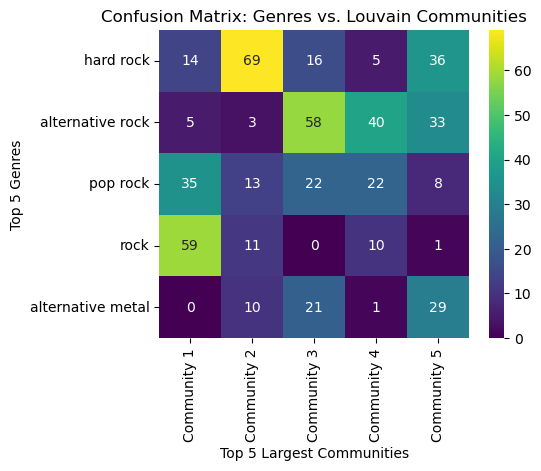

In [17]:
# Identify the 5 most common genres - Using all genres associated with each node
all_genres_list = []
for node, data in G.nodes(data=True):
    if 'genres' in data:
        all_genres_list.extend(data['genres'])

genre_counts = Counter(all_genres_list)
top_5_genres = [genre for genre, count in genre_counts.most_common(5)]
top_5_genres_set = set(top_5_genres)


# Identify the 5 largest communities
louvain_communities.sort(key=len, reverse=True)
top_5_communities = louvain_communities[:5]

# Create a set of all nodes that are in one of the top 5 communities
nodes_in_top_communities = set()
for community in top_5_communities:
    nodes_in_top_communities.update(community)


genre_to_idx = {genre: i for i, genre in enumerate(top_5_genres)}
# Map each node to its community index (1-5)
node_to_community_idx = {}
for i, community in enumerate(top_5_communities):
    for node in community:
        node_to_community_idx[node] = i


# Confusion matrix
confusion_matrix = np.zeros((5, 5), dtype=int)

# Iterate through all nodes in the graph that are in the top communities
for node in nodes_in_top_communities:
    # Check if the node has genre data
    if 'genres' in G.nodes[node]:
        node_genres = G.nodes[node]['genres']
        
        # Find which of the top 5 genres this node has
        relevant_genres = top_5_genres_set.intersection(node_genres)
        
        # If the node has at least one of the top 5 genre
        if relevant_genres:
            community_idx = node_to_community_idx[node]
            
            for genre in relevant_genres:
                genre_idx = genre_to_idx[genre]
                confusion_matrix[genre_idx, community_idx] += 1


# Visualize
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=[f'Community {i+1}' for i in range(5)],
            yticklabels=top_5_genres)
plt.title('Confusion Matrix: Genres vs. Louvain Communities')
plt.ylabel(f'Top {5} Genres')
plt.xlabel(f'Top {5} Largest Communities')
plt.show()

The Louvain algorithm produced six communities, which means we could not directly compare the top seven genres and communities as initially planned. Instead, we focused on the top five communities and the top five genres.

The rows of the matrix are the top‑5 genres in the entire network and the columns are the top-5 largest Louvain communities (out of the 6 we found). Each cell (i,j) in the confusion matrix is the number of nodes in community j that have genre i, where each band can have multiple genres. A lighter yellow color represents more bands falling into this cell and a darker the opposite. Therefore a yellow color means that many bands in Louvain community j have genre i among their listed genres.

For the genres and communities to be well alligned, every column needs to have only one standout high-value cell. This would mean that Louvain communities aligns well with the genres of the bands/nodes. If columns show several similar counts, the community is mixed across genres. We can see that community 2 and the 'hard rock' genre aligns; $\frac{69}{69+3+13+11+10}\sim65$% of community 2 consists of bands that have hard rock as one of their genres. On the contrary community 5 has a wider spread genre mix, where both 'hard rock, 'alternative rock' and 'alternative metal' are highly represented.

There is a large value in a row 'rock', community 1, and low numbers in the rest of the columns representing the communities. This means that almost all band that have rock genre fall into this community. If the row’s counts are spread across many columns, that genre is diffuse across multiple communities which is the case for 'pop-rock' for instance.

Because we counted every genre per band, a band may appear in multiple rows. As a result, column totals can exceed the actual number of bands, making interpretation more challenging.

A possible improvement would have been to create an umbrella category, “Rock genres”, combining all rock subgenres. This would collapse the top four genres into one and potentially change the conclusions. For this analysis, we kept genres separate.

-----
# Part 3: TF-IDF to understand genres and communities
The questions below are based on Lecture 7, part 2, 4, 5, 6 (and a little bit on part 3).

-----

## Explain the concept of TF-IDF in your own words and how it can help you understand the genres and communities

TF-IDF is a way to score/measure how important a word is for a text in relation to how frequent the word is used overall in all texts. For instance, if a word appears a lot in a text, it has a high TF, but it can still have a low IDF if it appears frequently in a lot of texts like for instance, we can imagine words like "the", "and", "good", "to" etc. word have high TF but low IDF.

TF is the frequency of the term in the text.
IDF is how rare the word is across all texts.

So in summary TF-IDF gives higher scores to words that are frequent in one document but rare across others.

This score/measure can help us understand the genres, because we can look through the texts of all bands in each genre. This will then highlight genre-specific terms/words. This could make it easier to cluster similar artists, as artist with similar high-scoring TF-IDF words can be grouped into comunities or genre clusters. TF-IDF can also help distinguish what makes each genre unique, by boosting words/terms that are frequent in one genre (high TF) and then downweighing words that are commen across all genres (low IDF). 

## Calculate and visualize TF-IDF for the genres and communities.

In the following we create TF lists of the tokens/words of the band wiki-texts. We have chosen in this process to do it by adding each artist to all their genre lists (if they have multiple genres). We have filtered out words that appear less than 5 times, and all punctuation. We have also made all characters lower case. We could see that the tokens still included a lot of wiki words and filler words like 'the',http,'of' 'and', 'ref' etc. we removed these, and other filler words as well.

We generate TF lists for the top 5 represented genres.

In [18]:
import os
import re
from collections import Counter, defaultdict
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 

def clean_wikitext(text):
    text = html.unescape(text)
    
    # Remove URLs and tags
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'\{\{.*?\}\}', ' ', text)
    text = re.sub(r'<ref.*?>.*?</ref>', ' ', text)
    text = re.sub(r'\[\[File:.*?\]\]', ' ', text)

    # Remove table junk
    text = re.sub(r'\b(bar|color|width|align|text|scope|center|style|bgcolor|rowspan|colspan)\b', ' ', text)

    # Handle wiki links, keeping the inner text
    text = re.sub(r'\[\[(?:[^|\]]*\|)?([^\]]+)\]\]', r'\1', text)
    
    # Remove non-alphabetic characters and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove capitalized words (likely proper names)
    text = re.sub(r'\b[A-Z][a-z]+\b', ' ', text)

    return text.lower()

# Create TF lists for each of the top 5 genres
# Assumes `top15` and `artists_with_genres` are available from previous cells.
top_5_genre_names = [genre for genre, count in top15[:5]]

# Directory where artist pages are stored
BANDS_TEXT_DIRECTORY = "Bands" #TODO

TF_lists={}

lemmatizer = WordNetLemmatizer()

# Aggregate text for each of the top 5 genres
genre_texts = defaultdict(str)

# Create a reverse map from genre to list of artists
# !! we add each artist to all their genre lists (if they have multiple genres)
genre_to_artists_map = defaultdict(list)
for artist, genres in artists_with_genres.items():
    for genre in genres:
        if genre in top_5_genre_names:
            genre_to_artists_map[genre].append(artist)

# Read files and append text
for genre, artists in genre_to_artists_map.items():
    for artist in artists:
        file_path = os.path.join(data_directory, f"{artist}.txt")
        if os.path.exists(file_path):
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    genre_texts[genre] += f.read() + "\n"
            except Exception as e:
                print(f"  Could not read file {file_path}: {e}")

# Process each genre document to create TF lists
for genre, text in genre_texts.items():

    # Use the cleaning function. (setting to lower case)
    text = clean_wikitext(text)
    
    # Tokenize and remove punctuation (find sequences of word characters)
    tokens = re.findall(r'\b[a-z]+\b', text)
    
    # Lemmatize words
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Count word frequencies
    word_counts = Counter(lemmatized_tokens)
    
    # Filter out rare words (appearing less than 5 times) and any stop words
    # Define a set of stop words and wiki-related noise to exclude
    stop_words = {
        'a', 'accessed', 'access', 'align', 'album', 'albums', 'an', 'and', 'archive',
        'archived', 'article', 'at', 'background', 'band', 'bands', 'bar', 'border',
        'by', 'category', 'center', 'chart', 'charts', 'cite', 'col', 'color', 'com',
        'date', 'external', 'file', 'first', 'font', 'for', 'from', 'group', 'he',
        'his', 'http', 'https', 'id', 'image', 'in', 'is', 'isbn', 'it', 'jpg',
        'label', 'last', 'links', 'lyrics', 'main', 'music', 'name', 'new', 'notes',
        'of', 'on', 'org', 'original', 'p', 'page', 'png', 'publisher', 'ref',
        'references', 'released', 'retrieved', 'row', 's', 'sfn', 'scope', 'song',
        'songs', 'svg', 'table', 'template', 'that', 'the', 'their',
        'they', 'till', 'time', 'title', 'to', 'url', 'via', 'wa', 'web', 'website',
        'width', 'with', 'work', 'www', 'year', 'cc','ska', 'rn', 'pp'
    }
    stop_words = ENGLISH_STOP_WORDS.union(stop_words) # Combine the lists

    frequent_word_counts = {word: count for word, count in word_counts.items() if count >= 5 and word not in stop_words}

    # Sort words by frequency in descending order
    sorted_word_counts = sorted(frequent_word_counts.items(), key=lambda item: item[1], reverse=True)
    
    # Store TF list in dictionary
    TF_lists[genre] = sorted_word_counts

[nltk_data] Downloading package wordnet to /Users/noa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Now that we have our TF lists for the top 5 genres, we will calculate the IDF and afterwards the TF-IDF.

In [19]:
### Compute IDF
def compute_idf(df, N, method="smooth"):
    if method == "standard":
        return math.log10(N / df)
    elif method == "smooth":
        return math.log10(N / (1 + df)) + 1
    elif method == "prob":
        return math.log10((N - df) / df)

# Calculate frequency for each word across genres/documents
document_frequency = defaultdict(int)
for _, tf_list in TF_lists.items():
    for word, _ in tf_list:
        document_frequency[word] += 1

num_documents = len(TF_lists)
idf = {}
for word, df in document_frequency.items():
    idf[word] = compute_idf(df, num_documents, method="standard")


### Compute TF-IDF scores for each word in each genre
genre_tfidf = {}
for genre, tf_list in TF_lists.items():
    tfidf_scores = {}
    for word, tf in tf_list:
        tfidf_scores[word] = tf * idf.get(word, 0)
    genre_tfidf[genre] = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)



We can now visualize the difference between the TF and TF-IDF in wordclouds. We have chosen to display the top 50 words to make it possible to distinguish between the words but still get a large representation. 

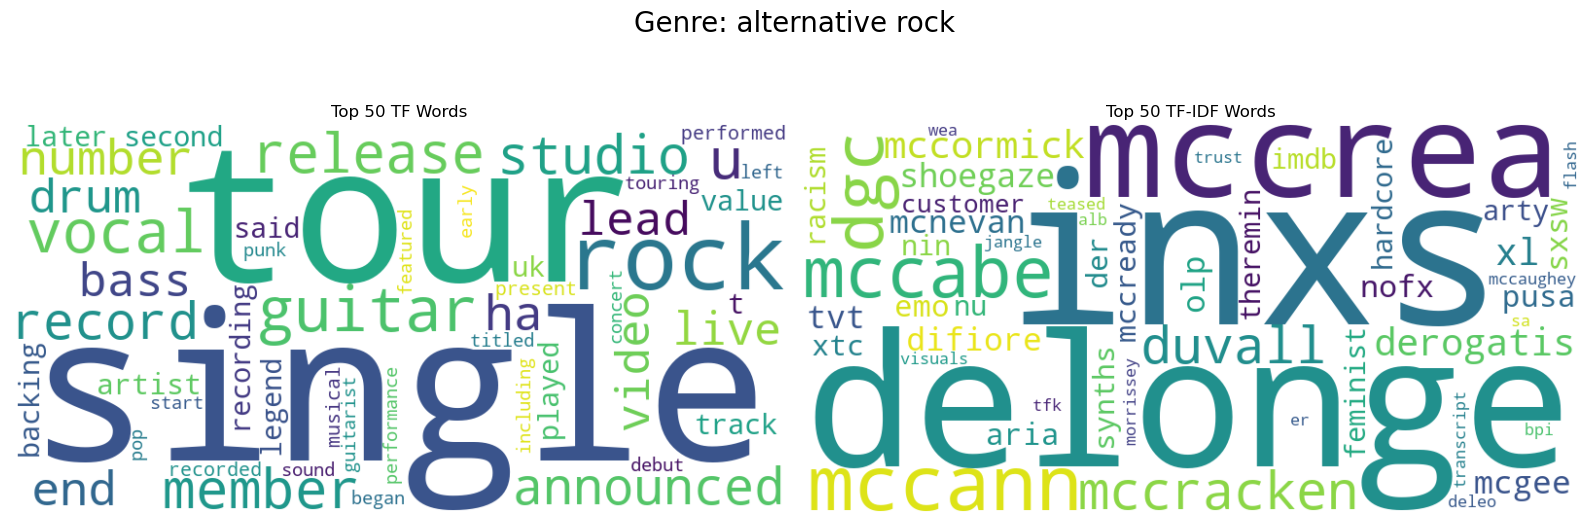

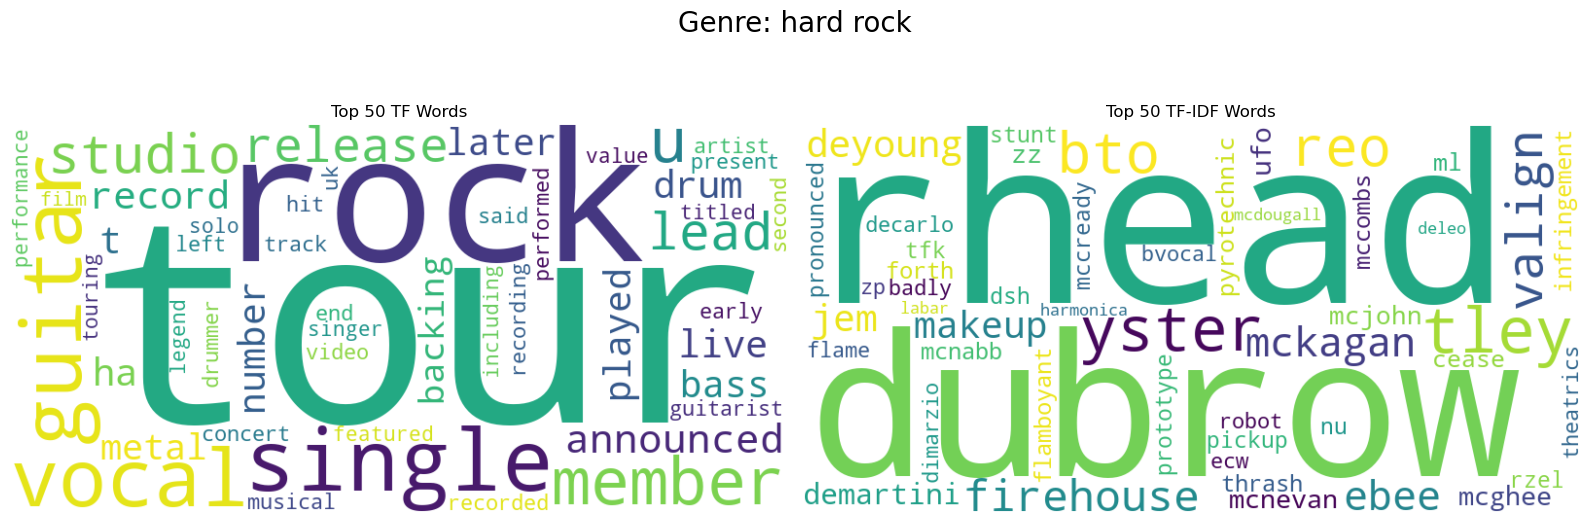

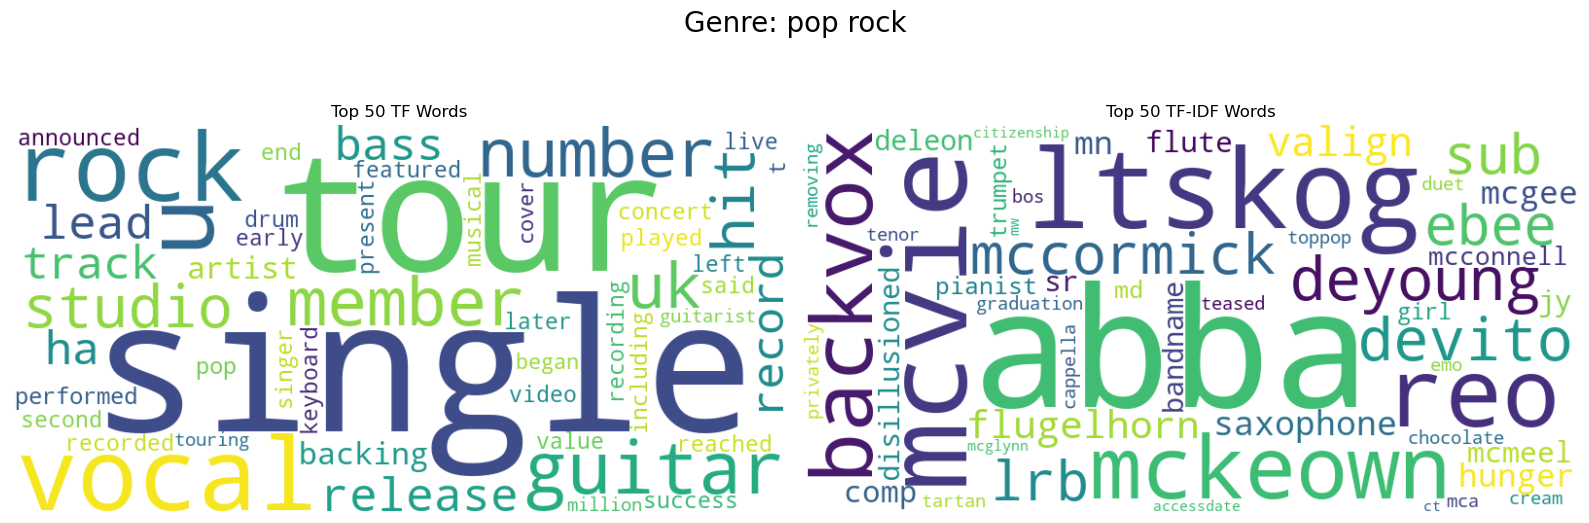

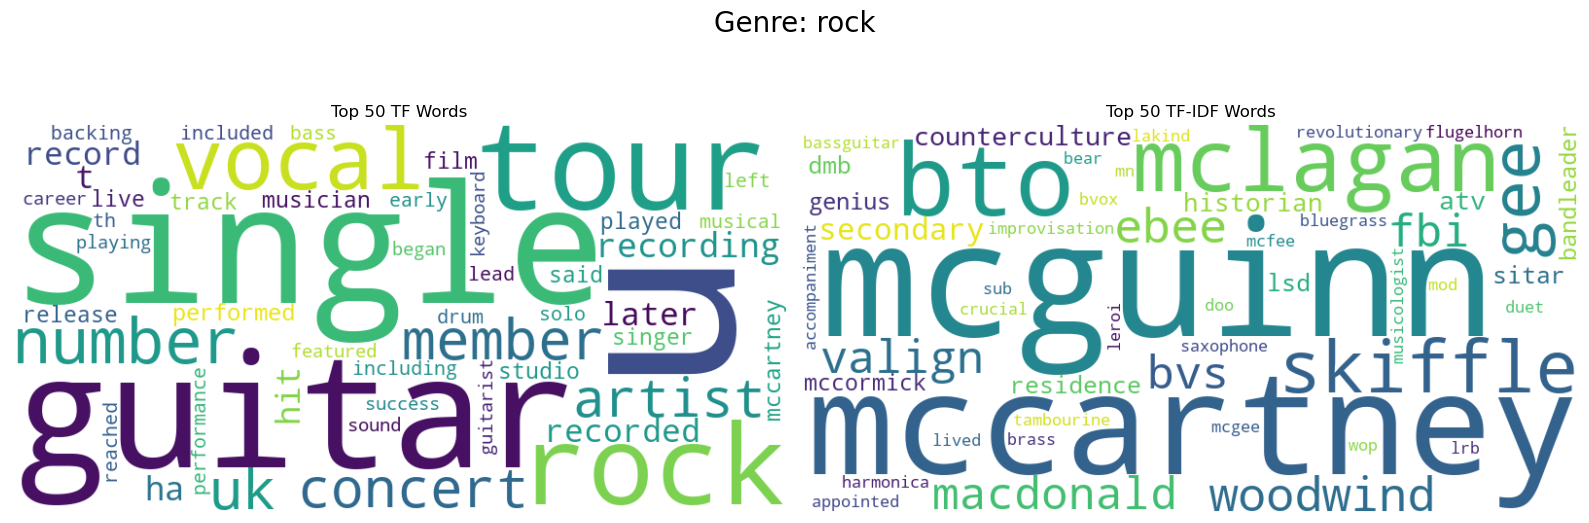

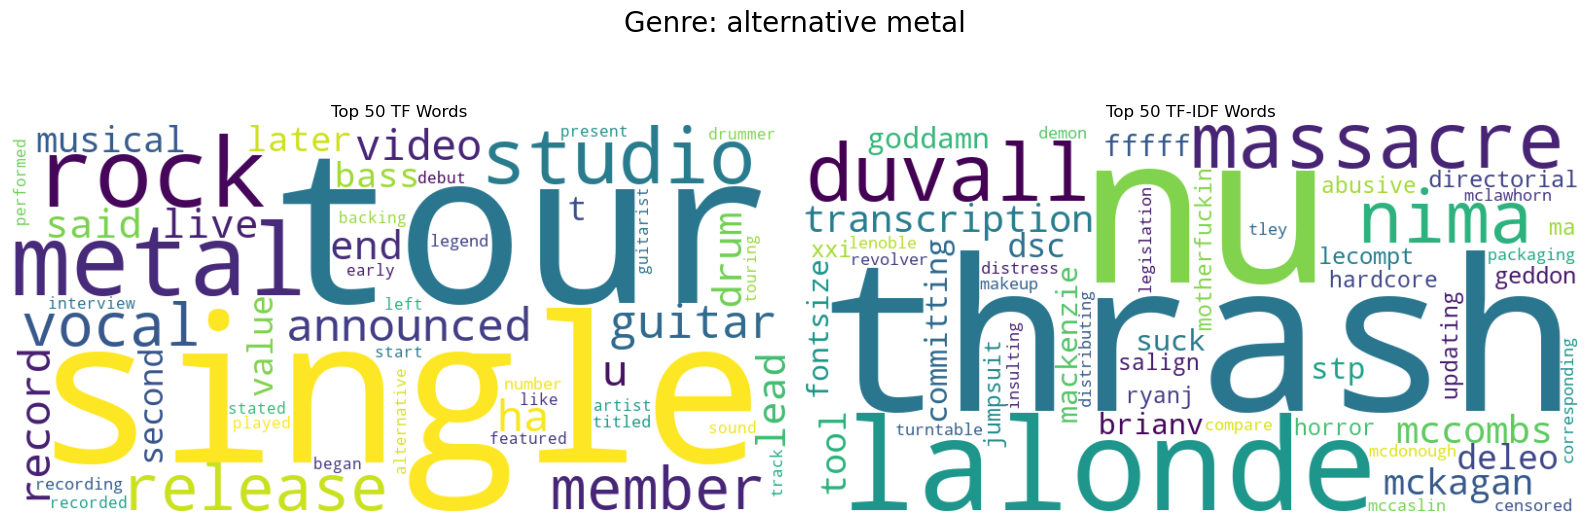

In [20]:
# create wordcloud for each genre with both TF and TF-IDF top 50 words
from wordcloud import WordCloud

for genre in top_5_genre_names:
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Set the main title for the figure to be the genre name
    fig.suptitle(f'Genre: {genre}', fontsize=20, y=0.98)
    
    # --- TF WordCloud (Left Subplot) ---
    tf_words = dict(TF_lists[genre][:50])
    wordcloud_tf = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tf_words)
    
    axes[0].imshow(wordcloud_tf, interpolation='bilinear')
    axes[0].axis('off')
    axes[0].set_title('Top 50 TF Words')
    
    # --- TF-IDF WordCloud (Right Subplot) ---
    tfidf_words = dict(genre_tfidf[genre][:50])
    wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_words)
    
    axes[1].imshow(wordcloud_tfidf, interpolation='bilinear')
    axes[1].axis('off')
    axes[1].set_title('Top 50 TF-IDF Words')
    
    plt.tight_layout()
    plt.show()

The word clouds on the left (TF) are dominated by very common music-related terms such as “single”, “tour”, “rock”, “release”, and “guitar”. These words appear across almost all genres because they must be frequent in Wikipedia band pages regardless of genre. As a result, the TF-based word clouds look very similar across genres, making it hard to distinguish one genre from another.
In contrast, the word clouds on the right (TF-IDF) are much more genre-specific. Common filler words and globally frequent terms have been down-weighted by the IDF component, allowing more distinctive tokens/words to surface. For example, in the alternative rock TF-IDF cloud, we see names like “delonge”, “inxs”, “mccrea”, and terms like “shoegaze” and “hardcore”, which are strongly associated with that genre. This demonstrates that TF-IDF is better at highlighting unique identifiers for each genre.


Despite trying to clean the wiki text, some tokens in the TF-IDF clouds are still not meaningful words (e.g., abbreviations, artifacts like “dgc”, “xl”, or leftover wiki markup). This suggests that the text cleaning process could be refined further. A possible improvement could be a better scraping strategy of the wiki page.

Because each artist’s page was added to all their genres in the list, the same band text appears in multiple genres. This introduces cross-contamination, making genres look more similar than they truly are. For example, if a band belongs to both alternative rock and punk rock, its vocabulary will inflate overlap between those genres. We could have only added a band to their first genre in the list or to a randomly chosen genre in the list to reduce the effect of multi-genre duplication.

Now we can visualize the same for the communities. We have created txt files for each of the Louvain communities, where we add the band wikitext to the files, if the band belong to the community. 

Now we can as above create the TF lists for the community texts and compute the TF-IDF scores, and display the word clouds. 

In [21]:
# Create TF lists for the top 5 Louvain communities
# Assumes `top_5_communities`, `nodes_in_top_communities` and `node_to_community_idx` are available from previous cells.

TF_comm_lists={}

lemmatizer_comm = WordNetLemmatizer()

# Aggregate text for each of the communities
comm_texts = defaultdict(str)

# Read files and append text
for i, community in enumerate(top_5_communities):
    for artist in community:
        file_path = os.path.join(data_directory, f"{artist}.txt")
        if os.path.exists(file_path):
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    comm_texts[i] += f.read() + "\n"
            except Exception as e:
                print(f"  Could not read file {file_path}: {e}")

# Process each community document to create TF lists
for community_idx, text in comm_texts.items():

    # Use the cleaning function. (setting to lower case)
    text = clean_wikitext(text)
    
    # Tokenize and remove punctuation (find sequences of word characters)
    tokens = re.findall(r'\b[a-z]+\b', text)
    
    # Lemmatize words
    lemmatized_tokens = [lemmatizer_comm.lemmatize(token) for token in tokens]
    
    # Count word frequencies
    word_counts = Counter(lemmatized_tokens)
    
    # Filter out rare words (appearing less than 5 times) and any stop words
    frequent_word_counts = {word: count for word, count in word_counts.items() if count >= 5 and word not in stop_words}

    # Sort words by frequency in descending order
    sorted_word_counts = sorted(frequent_word_counts.items(), key=lambda item: item[1], reverse=True)
    
    # Store TF list in dictionary
    TF_comm_lists[community_idx] = sorted_word_counts

We constructed one text file per Louvain community, concatenating the Wikipedia band texts of all artists assigned to that community. Following the same pipeline as for genres, we (i) cleaned the wiki text, (ii) built term frequencies (TF) after removing punctuation, lower‑casing, lemmatizing and filtering rare tokens (≥5 occurrences) and noisy wiki artifacts.

We can now comput TF‑IDF using document frequencies at the community level (each community = one “document”). 

In [22]:
### Compute IDF
# Calculate frequency for each word across documents
document_frequency_comm = defaultdict(int)
for _, tf_list in TF_comm_lists.items():
    for word, _ in tf_list:
        document_frequency_comm[word] += 1

num_documents = len(TF_comm_lists)
idf_comm = {}
for word, df in document_frequency_comm.items():
    idf_comm[word] = compute_idf(df, num_documents, method="standard")


### Compute TF-IDF scores for each word in each community
genre_tfidf_comm = {}
for comm, tf_list in TF_comm_lists.items():
    tfidf_scores_comm = {}
    for word, tf in tf_list:
        tfidf_scores_comm[word] = tf * idf_comm.get(word, 0)
    genre_tfidf_comm[comm] = sorted(tfidf_scores_comm.items(), key=lambda x: x[1], reverse=True)



Now we can visualize the top‑50 tokens for both TF and TF‑IDF with word clouds.

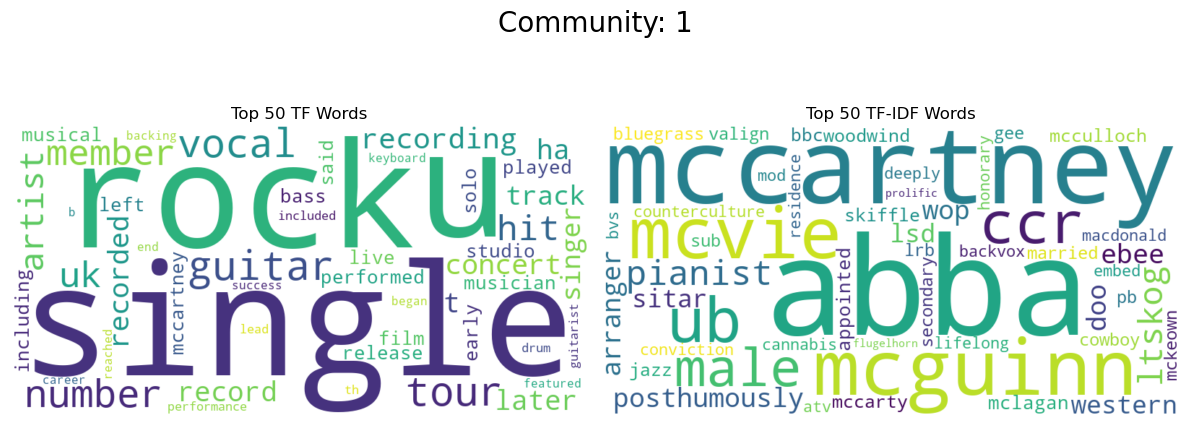

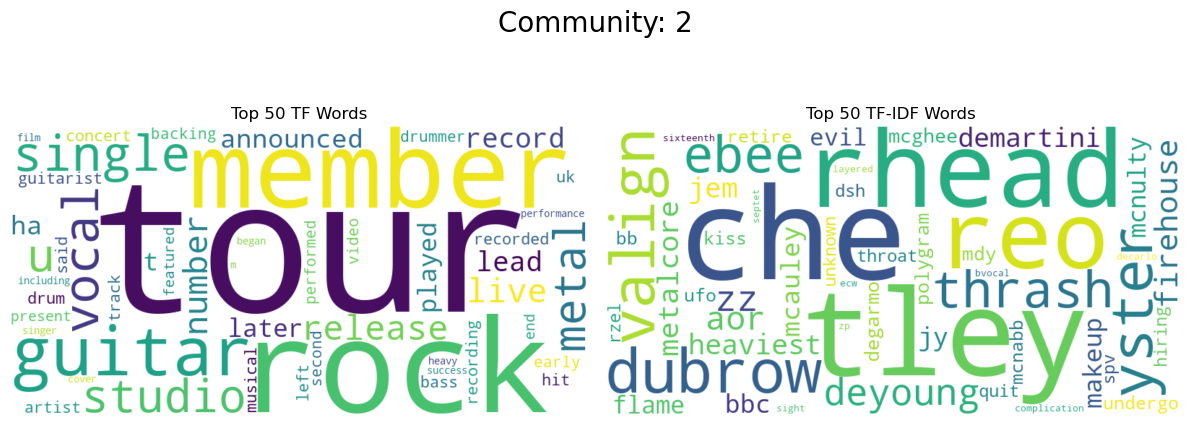

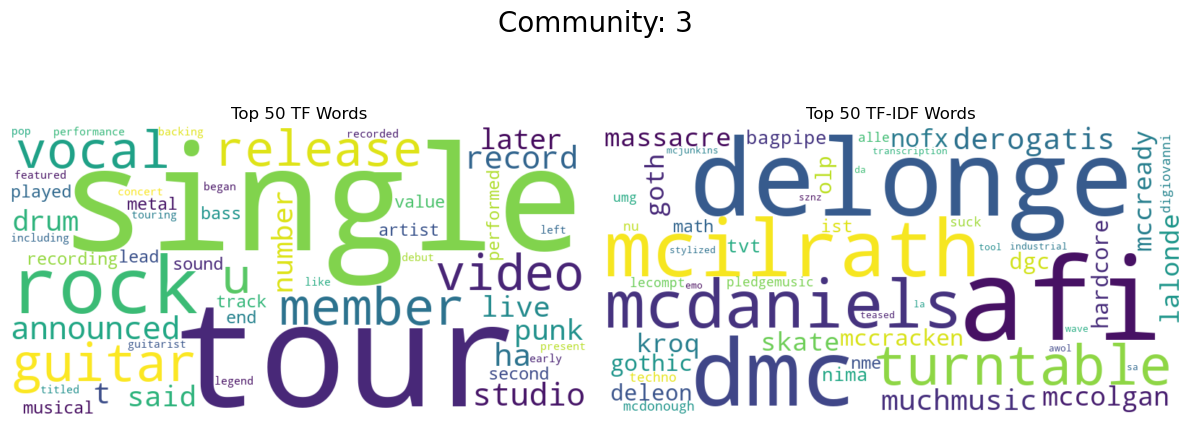

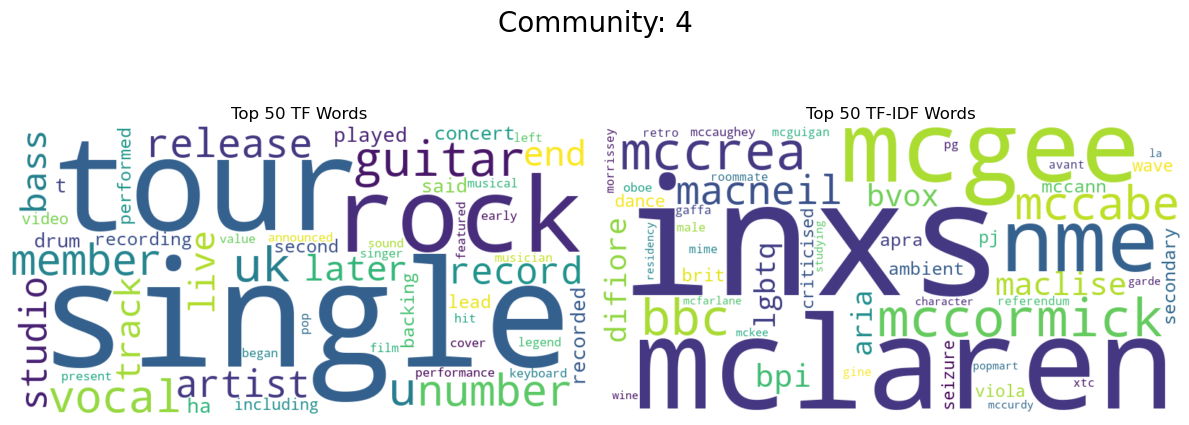

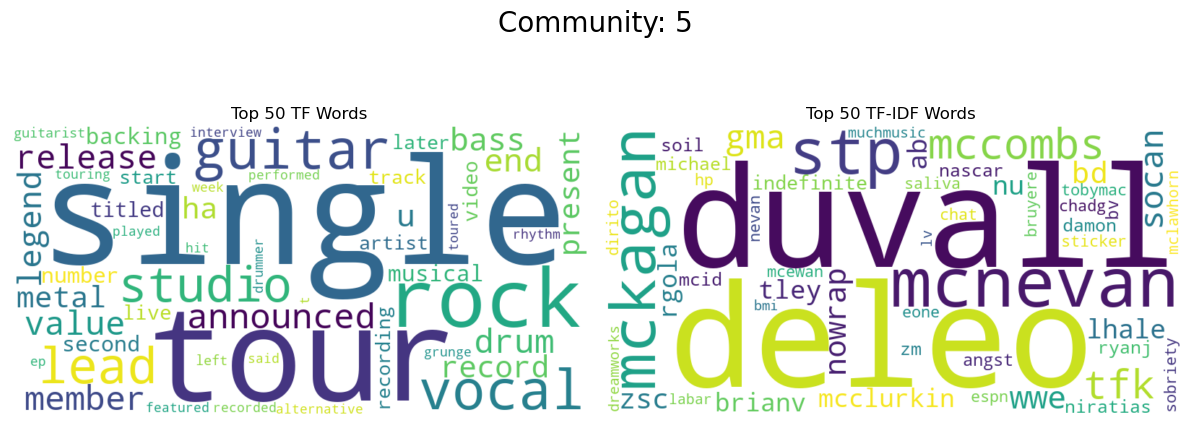

In [29]:
from wordcloud import WordCloud

for comm in range(len(TF_comm_lists)):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Set the main title for the figure to be the community name
    fig.suptitle(f'Community: {comm+1}', fontsize=20, y=0.98)
    
    # --- TF WordCloud (Left Subplot) ---
    tf_words_comm = dict(TF_comm_lists[comm][:50])
    wordcloud_tf_comm = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tf_words_comm)

    axes[0].imshow(wordcloud_tf_comm, interpolation='bilinear')
    axes[0].axis('off')
    axes[0].set_title('Top 50 TF Words')
    
    # --- TF-IDF WordCloud (Right Subplot) ---
    tfidf_words_comm = dict(genre_tfidf_comm[comm][:50])
    wordcloud_tfidf_comm = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_words_comm)

    axes[1].imshow(wordcloud_tfidf_comm, interpolation='bilinear')
    axes[1].axis('off')
    axes[1].set_title('Top 50 TF-IDF Words')
    
    plt.tight_layout()
    plt.show()

The TF word clouds for communities (Left) look very similar across all five Louvain clusters, dominated by high-frequency but low-specificity tokens, similar to teh genre clouds. This confirms that TF is not sufficient for distinguishing communities.

In contrast, the TF-IDF word clouds (right) reveal a clear pattern: they are filled with proper names, band names, record labels, etc. This is expected because the Louvain communities are network-defined, and had a higher modularity than the genres. TF-IDF makes the community-specific vocabulary much more visible.

However, some tokens are still non-informative, indicating that further cleaning and possibly better scraping (e.g., via the Wikipedia API) would improve interpretability, like we saw with the genres.


## Use the matrix $D$ (Lecture 7, part 2) to dicusss the difference between the word-clouds between genres and communities.

Looking at the D matrix (also plotted below), as we saw before the hard rock genre and louvain community 2 has a "strong" overlap, therefore it would be interesting to look further into the two TF-IDF wordclouds of these two, to see if they are similar.

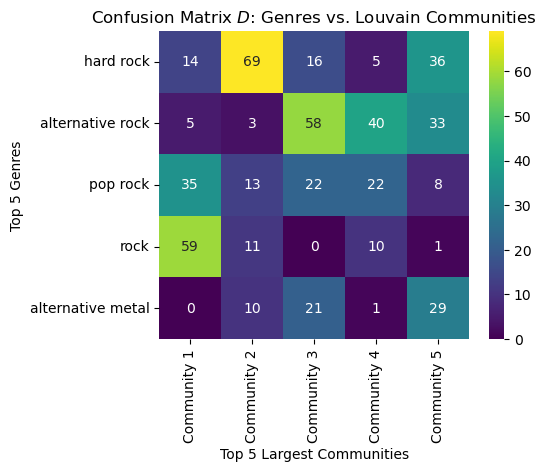

In [24]:
# Visualize D
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=[f'Community {i+1}' for i in range(5)],
            yticklabels=top_5_genres)
plt.title('Confusion Matrix $D$: Genres vs. Louvain Communities')
plt.ylabel(f'Top {5} Genres')
plt.xlabel(f'Top {5} Largest Communities')
plt.show()


The confusion matrix $D$ shows the overlap between the top 5 genres and the top 5 Louvain communities based on shared bands. One cell stands out (D(1,2)): Hard Rock vs Community 2 with a count of 69, indicating a strong relationship. This actually means that Community 2 contains many nodes/bands having Hard Rock as one of their genres.
To investigate whether this structural overlap translates into word/text similarity, we would like to compare the TF-IDF word clouds for Hard Rock and Community 2. If the overlap in $D$ reflects shared vocabulary, we expect these two clouds to look similar.

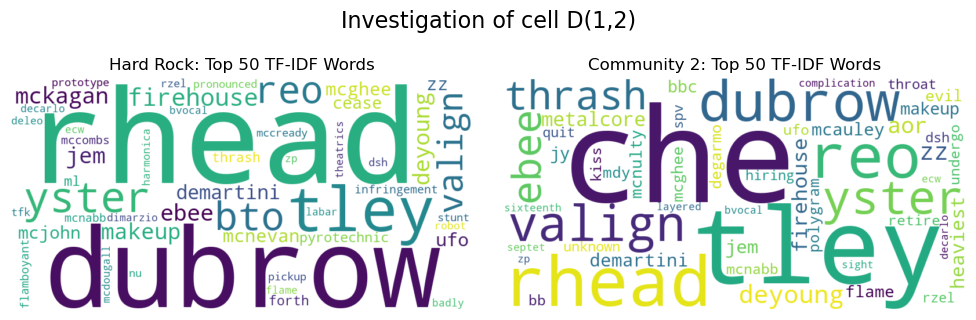

In [28]:
# Wordclouds for hard rock and community 2
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Set the main title for the figure to be the community name
fig.suptitle(f'Investigation of cell D(1,2)', fontsize=16, y=1.05)

# --- TF-IDF WordCloud 'hard rock' (Left Subplot) ---
wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(genre_tfidf['hard rock'][:50]))
axes[0].imshow(wordcloud_tfidf, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Hard Rock: Top 50 TF-IDF Words')

# --- TF-IDF WordCloud 'Community 2' (Right Subplot) ---
wordcloud_tfidf_comm = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(genre_tfidf_comm[1][:50]))
axes[1].imshow(wordcloud_tfidf_comm, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Community 2: Top 50 TF-IDF Words')

plt.tight_layout()
plt.show()


The two TF-IDF word clouds (Hard Rock vs Community 2) share some tokens such as dubrow, reo, head, firehouse, and valign. Therefore we can see that there are some word overlap. Both clouds also include band names and other genre specific words associated with classic rock and metal scenes (thrash, ZZ, ufo).

However, there are also some notable differences. The Hard Rock cloud (left) emphasizes terms like pyrotechnic, prototype, and pickup, which relate to performance and musicality.
The Community 2 cloud (right) includes tokens like retire, revamped, and hiring, suggesting more biographical language.

It would be interesting to inspect pairs with low overlap in $D$ (e.g., Alternative Rock vs Community 1). These should exhibit minimal lexical similarity, but this is not done in this analysis.

While the confusion matrix $D$ shows structural overlap between genres and communities based on shared bands/nodes, it does not tell us how similar their texts/words/vocabularies are. To measure this, we compute the Jaccard overlap between the top-50 TF-IDF terms for each genre and each community. This metric is the proportion of shared distinctive words relative to the union of both sets. This provides a more nuanced view of whether high structural overlap (as seen in $D$) corresponds to high textual overlap (seen in the owrd clouds).
By visualizing these Jaccard scores in a heatmap, we can identify pairs that share many distinctive tokens (e.g., Hard Rock and Community 2). This helps us understand whether genres and communities organize language similarly or differently.

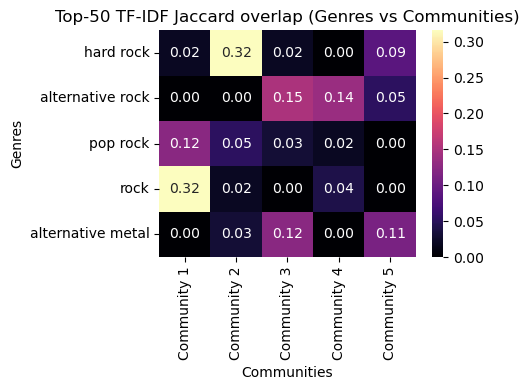

In [25]:
# Compute Jaccard overlap between top-50 TF-IDF for top-5 genres and top-5 communities
import pandas as pd
import seaborn as sns

k = 50

# Align with D: same row/col ordering
genres = top_5_genres                     # rows like D
comms = list(range(len(top_5_communities)))  # cols like D (Community 1..5)

# Safe lookups (skip if a genre wasn't TF-IDF'ed earlier)
topk_genre = {g: set([w for w, _ in genre_tfidf.get(g, [])[:k]]) for g in genres}
topk_comm  = {c: set([w for w, _ in genre_tfidf_comm[c][:k]]) for c in comms}

J = np.zeros((len(genres), len(comms)))
for i, g in enumerate(genres):
    for j, c in enumerate(comms):
        inter = len(topk_genre[g] & topk_comm[c])
        union = len(topk_genre[g] | topk_comm[c]) or 1
        J[i, j] = inter / union

plt.figure(figsize=(5, 4))
sns.heatmap(J, annot=True, fmt=".2f", cmap="magma",
            xticklabels=[f"Community {c+1}" for c in comms],
            yticklabels=genres)
plt.title("Top-50 TF-IDF Jaccard overlap (Genres vs Communities)")
plt.xlabel("Communities")
plt.ylabel("Genres")
plt.tight_layout()
plt.show()

The Jaccard similarity heatmap quantifies the overlap between the top-50 TF-IDF terms for each genre and community. The highest value (0.32) occurs between Rock and Community 1 and by Hard Rock and Community 2 (0.32), consistent with the confusion matrix $D$, where these cells also has high frequencies. Most other pairs have very low overlap (<0.15). This means that genres and communities generally organize vocabulary differently.

----

# Part 4: Sentiment of the artists and communities

The questions below are based on Lecture 8

- Calculate the sentiment of the band/artist pages (it is OK to work with the sub-network of artists-with-genre) and describe your findings using stats and visualization, inspired by the first exercise of week 8.
- Discuss the sentiment of the communities. Do the findings using TF-IDF during Lecture 7 help you understand your results?


----

### Calculate the sentiment of the band/artist pages and describe your findings

In [ ]:
def load_word_list(p: Path):
    # TODO: set correct path to word list
    path_to_word_list = r"/Users/iben/Desktop/Social_graphs/SocialGraphs/Hedonometer.csv"
    #path_to_word_list = r"https://raw.githubusercontent.com/noanorgaard/SocialGraphs/refs/heads/main/Assignment2/Hedonometer.csv"
    p = Path(path_to_word_list)

    df = pd.read_csv(p, encoding='utf-8', engine='python')
    word_col_candidates = [c for c in df.columns if 'word' in c.lower()]
    score_col_candidates = [c for c in df.columns if 'happiness' in c.lower() or 'score' in c.lower()]

    if word_col_candidates:
        word_col = word_col_candidates[0]
    else:
        word_col = df.columns[0]  # fallback

    if score_col_candidates:
        score_col = score_col_candidates[0]
    else:
        # fallback: first numeric column
        num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
        score_col = num_cols[0] if num_cols else df.columns[1]

    w_l = dict(zip(df[word_col].astype(str).str.lower(), df[score_col].astype(float)))

    if score_col is None and df.shape[1] >= 2:
        score_col = df.columns[1]
    w_l = dict(zip(df[word_col].astype(str).str.lower(), df[score_col].astype(float)))

    return w_l

def calculate_sentiment(tokens, labmt_data=None):
    """
    Calculate average sentiment score for a list of tokens using LabMT word list

    """
    # Get scores for tokens that exist in labmt
    scores = [labmt_data[token] for token in tokens if token in labmt_data]

    # Return average if we found any scores, otherwise return neutral score (5.0)
    if scores:
        return sum(scores) / len(scores)
    return 5.0

def tokenize(text):
    tokens = word_tokenize(text.lower())
    return [t for t in tokens if t.isalpha()]

def top3_within_community(G_undirected, nodes_set, weight="weight"):
    if not nodes_set:
        return []
    H = G_undirected.subgraph(nodes_set)
    # degree weighted if 'weight' exists; otherwise counts edges
    deg = H.degree(weight=weight if any('weight' in d for _, _, d in H.edges(data=True)) else None)
    # sort by degree desc, then by name for tie-stability
    top = sorted(deg, key=lambda kv: (-kv[1], str(kv[0])))[:3]
    return [n for n, _ in top]


def clean_wikitext(text):
    """
    Removes Wikipedia markup, URLs, and other non-content tokens from the text.
    """
    # Unescape HTML entities like &amp;
    text = html.unescape(text)
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    
    # Remove templates and references
    text = re.sub(r'\{\{.*?\}\}', ' ', text)
    text = re.sub(r'<ref.*?>.*?</ref>', ' ', text)
    text = re.sub(r'<.*?>', ' ', text) # Remove remaining HTML tags
    
    # Handle wiki links, keeping the inner text
    text = re.sub(r'\[\[(?:[^|\]]*\|)?([^\]]+)\]\]', r'\1', text)
    
    # Remove non-alphabetic characters and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text.lower()

def get_band_text(band_name, bands_folder):
    """
    Retrieves and cleans the wikitext for a given band from a local file.
    """
    file_path = bands_folder / f"{band_name}.txt"
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_content = f.read()
    
    # Try to parse as JSON, which seems to be the format
    data = json.loads(raw_content)
    page_id = next(iter(data["query"]["pages"]))
    wikitext = data["query"]["pages"][page_id]["revisions"][0]["slots"]["main"]["*"]
    return clean_wikitext(wikitext)




In [ ]:
# TODO: set correct path to bands folder and word list 
path_to_bands_folder = Path(r"/Users/iben/Desktop/Social_graphs/SocialGraphs/Noa/Bands")
#path_to_bands_folder = r"https://raw.githubusercontent.com/noanorgaard/SocialGraphs/refs/heads/main/Assignment2/Bands"
path_to_word_list = r"/Users/iben/Desktop/Social_graphs/SocialGraphs/Hedonometer.csv"
#path_to_word_list = r"https://raw.githubusercontent.com/noanorgaard/SocialGraphs/refs/heads/main/Assignment2/Hedonometer.csv"


# Load the sentiment dictionary
w_l = load_word_list(Path(path_to_word_list))

#load graph
# path_to_graph = r"C:\Users\Madsl\Dropbox\DTU\Kand\2.semester\Socialgraphs_and_interactions\SocialGraphs\SocialGraphs\Noa\Bands_with_genres.graphml"
path_to_graph = r"/Users/iben/Desktop/Social_graphs/SocialGraphs/Noa/Bands_with_genres.graphml"
G = nx.read_graphml(path_to_graph)


# Iterate through band text files
for file in path_to_bands_folder.glob("*.txt"):
    
    # Extract band name from filename
    band_name = file.stem

    # Read file content
    wikitext = file.read_text(encoding='utf-8')
    text = clean_wikitext(wikitext)

    # Tokenize text
    tokens = tokenize(text)

    # Calculate sentiment
    sentiment_score = calculate_sentiment(tokens, labmt_data=w_l)

    # Set sentiment 
    if band_name in G:
        G.nodes[band_name]["sentiment"] = sentiment_score

# Check example
print("\nTotal nodes with sentiment:", sum("sentiment" in G.nodes[n] for n in G.nodes))



Total nodes with sentiment: 472


Our original network had 472 nodes, meaning that we have succesfully calculated the sentiment score for everyone of them. Firstly we want to compute the average sentiment per genre, to see if it alligns with the TD-IDF analysis we did earlier.  

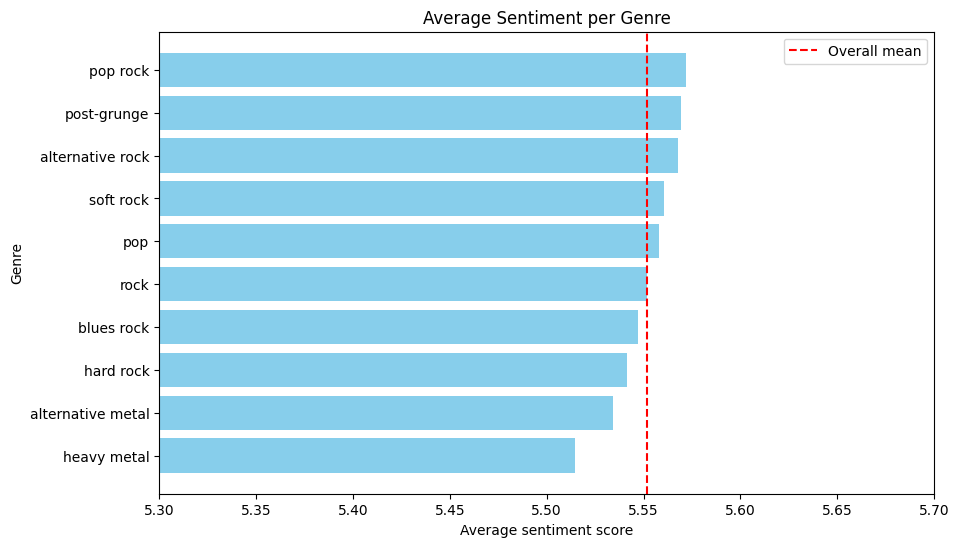

In [29]:
# Sentiment per genre

# Extract genres for each node
genre_sentiments = defaultdict(list)

for node, data in G.nodes(data=True):
    sentiment = data.get("sentiment")
    genres = data.get("genres")

    if sentiment is None or genres is None:
        continue

    if isinstance(genres, str):
        try:
            genres = ast.literal_eval(genres)
        except Exception:
            genres = [genres]

    if not isinstance(genres, (list, tuple)):
        genres = [genres]

    # Assign sentiment to each genre 
    for genre in genres:
        genre_sentiments[genre].append(sentiment)

# Aggregate mean 
genre_stats = []
for genre, values in genre_sentiments.items():
    if len(values) > 40:  # ignore rare genres
        genre_stats.append({
            "genre": genre,
            "n_bands": len(values),
            "mean_sentiment": np.mean(values),
            "median_sentiment": np.median(values),
            "std_sentiment": np.std(values)
        })

df_genre_sent = pd.DataFrame(genre_stats).sort_values("mean_sentiment", ascending=False)
# print(df_genre_sent.head(20))

plt.figure(figsize=(10,6))
plt.barh(df_genre_sent["genre"], df_genre_sent["mean_sentiment"], color='skyblue')
plt.axvline(np.mean([d["mean_sentiment"] for d in genre_stats]), color='red', linestyle='--', label='Overall mean')
plt.xlabel("Average sentiment score")
plt.ylabel("Genre")
plt.title("Average Sentiment per Genre")
plt.legend()
plt.gca().invert_yaxis()
plt.xlim(5.3, 5.7)
plt.show()


TODO figur tekst

Although that the overall variation is quite small, we still see a clear pattern. Pop rock, post-grunge, and alternative rock have the highest average sentiment scores, while heavy metal and alternative metal appear at the lower end. This of course alligns quite well with the general narative that metal genres are charaterized by darker language, while pop-oriented genres are more positiv.

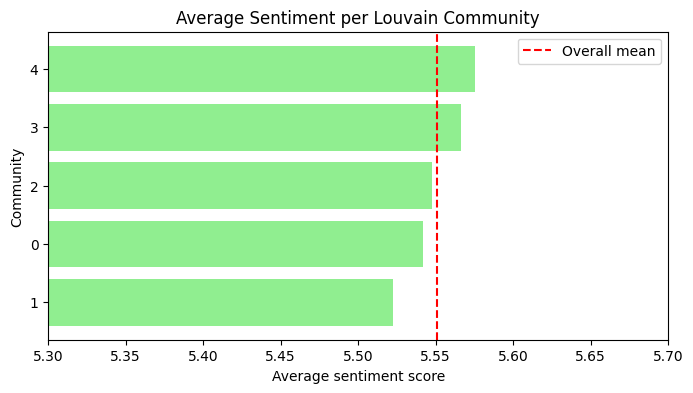

In [ ]:
# Sentiment per community in the Louvain partition
community_sentiments = defaultdict(list)

for i, community in enumerate(louvain_communities):
    for node in community:
        sentiment = G.nodes[node].get("sentiment")
        if sentiment is not None:
            community_sentiments[i].append(sentiment)
# Aggregate mean
community_stats = []
for comm_idx, values in community_sentiments.items():
    community_stats.append({
        "community": comm_idx,
        "n_bands": len(values),
        "mean_sentiment": np.mean(values),
        "median_sentiment": np.median(values),
        "std_sentiment": np.std(values)
    })
df_community_sent = pd.DataFrame(community_stats).sort_values("mean_sentiment", ascending=False)
# print(df_community_sent.head(20))

plt.figure(figsize=(8,4))
plt.barh(df_community_sent["community"].astype(str), df_community_sent["mean_sentiment"], color='lightgreen')
plt.axvline(np.mean([d["mean_sentiment"] for d in community_stats]), color='red', linestyle='--', label='Overall mean')
plt.xlabel("Average sentiment score")
plt.ylabel("Community")
plt.title("Average Sentiment per Louvain Community")
plt.legend()
plt.gca().invert_yaxis()
plt.xlim(5.3, 5.7)
plt.show()





TODO figur tekst og analyse

CHAT: All five communities have average sentiment scores between ~5.32 and ~5.58, so differences are small but noticeable.
Community 4 has the highest average sentiment (slightly above the overall mean), while Community 1 has the lowest (slightly below).
The overall mean is close to the center of the range, suggesting no extreme polarity between communities.

---

#### Statistics and visualization

---



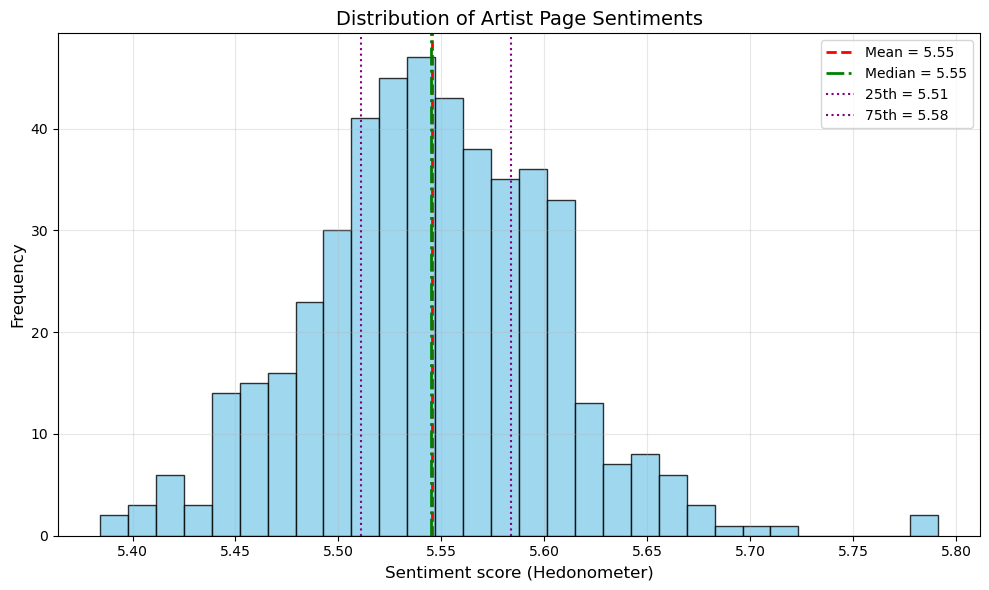

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract sentiment values from your graph
sentiments = nx.get_node_attributes(G, "sentiment")

# Convert to numpy array for easy stats
sentiment_values = np.array(list(sentiments.values()))

# Compute summary statistics
mean_val = np.mean(sentiment_values)
median_val = np.median(sentiment_values)
var_val = np.var(sentiment_values)
p25 = np.percentile(sentiment_values, 25)
p75 = np.percentile(sentiment_values, 75)

# Histogram
plt.figure(figsize=(10,6))
plt.hist(sentiment_values, bins=30, color="skyblue", edgecolor="black", alpha=0.8)
plt.title("Distribution of Artist Page Sentiments", fontsize=14)
plt.xlabel("Sentiment score (Hedonometer)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add vertical lines for summary stats
plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f}")
plt.axvline(median_val, color="green", linestyle="-.", linewidth=2, label=f"Median = {median_val:.2f}")
plt.axvline(p25, color="purple", linestyle=":", linewidth=1.5, label=f"25th = {p25:.2f}")
plt.axvline(p75, color="purple", linestyle=":", linewidth=1.5, label=f"75th = {p75:.2f}")

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Our histgram shows us that we have a very narrow spread of sentiment scores, with values clustered closely around the mean 5.55. Only a very small deviation in sentiment score seperates the "saddest" and "happiest" artist. This is to be expected since wikipidia strives to be as neutral in tone and objective as they can. The only cause for the fluctuations would be describtions of lyrics, events or biographical details regarding the bands.  

In [ ]:
# Sort bands by sentiment
sorted_bands = sorted(sentiments.items(), key=lambda x: x[1])

# 10 saddest
print("\n 10 Saddest artists:")
for band, val in sorted_bands[:10]:
    print(f"{band:30s}  {val:.2f}")

# 10 happiest
print("\n 10 Happiest artists:")
for band, val in sorted_bands[-10:][::-1]:  
    print(f"{band:30s}  {val:.2f}")



 10 Saddest artists:
Gary_Glitter                    5.38
Canned_Heat                     5.40
Marilyn_Manson                  5.40
W_A_S_P___band_                 5.41
Five_Finger_Death_Punch         5.41
Ted_Nugent                      5.42
Black_Sabbath                   5.42
Rage_Against_the_Machine        5.42
Pantera                         5.42
Sex_Pistols                     5.42

 10 Happiest artists:
Tracy_Chapman                   5.79
Lenny_Kravitz                   5.79
The_Boxtones                    5.72
Edgar_Winter                    5.70
Michael_Martin_Murphey          5.69
The_Cardigans                   5.68
Greta_Van_Fleet                 5.67
Fun__band_                      5.67
Train__band_                    5.67
Manfred_Mann_Chapter_Three      5.67


Generally we see here that artist in the metal genres are "sadder" then those accosiated with pop, which alligns well with our per-genre sentiment analysis. We do have outliers though, such as Gary Glitter, that are considered a pop-musician, ranked as the "saddedst" artist. The reason for his supposed sadness quickly beacomes apparent when skimming his wikipedia page, as a big part of his wiki-page is focused on his sexual offenses and criminal record. 

---

### Discuss the sentiment of the communities. Do the findings using TF-IDF during Lecture 7 help you understand your results?

---

TODO måske nævn sentiment analyse af communities

When looking at the list of saddest and happiest artist, we needn't read a lot of the their wikipages to make sense of the results. We can take the happiest artist 'Tracy Chapan' and compare to of the saddest 'Marilyn Manson'. Tracy Chapman is an award winning artist with a lot of critically aclaimed songs and albums, who is also considered to an social activist that does charity work. Compring here to 'Marilyn Manson' whos name alone is a combination [quoting from wikipidea] '... an American female sex symbol with the last name of a male serial killer', and has been considered by some to have influenced the perpetrators of the columbine high school massacre. With this it isnt a suprise that these artist have the sentiment score they do. 

Tracy chapman are considered to make pop and blues rock while Marilyn Manson are associated with 'alternative metal' and gothick rock. We found earlier that alternative metal has the lowest mean sentiment score while pop has the highest. This is complimented by the result from the TF-IDF analysis, that showed that pop and soft rock are characterized by words like "hit", "single" and "concert" somewhat reflecting positive themes of succes and recognition. While alternative metal and grunge is accosiated with words like "studio", “record”, and “tour” suggesting a more factual tone. So while the TF-IDF does not give us an idea of the emotion in the wiki pages, it supports the pattern we found in the sentiment analysis, that pop related communities has a slightly more postive textual framing than "heavier" genres.